## Temperature Forecast Project using ML 

### Project Description

This data is for the purpose of bias correction of next-day maximum and minimum air temperatures forecast of the LDAPS model operated by the Korea Meteorological Administration over Seoul, South Korea. This data consists of summer data from 2013 to 2017. The input data is largely composed of the LDAPS model's next-day forecast data, in-situ maximum and minimum temperatures of present-day, and geographic auxiliary variables. There are two outputs (i.e. next-day maximum and minimum air temperatures) in this data. Hindcast validation was conducted for the period from 2015 to 2017.

In [1]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Importing Data set

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Dataset2/main/temperature.csv')
df

station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
0         1.0  30-06-2013          28.7          21.4    58.255688   
1         2.0  30-06-2013          31.9          21.6    52.263397   
2         3.0  30-06-2013          31.6          23.3    48.690479   
3         4.0  30-06-2013          32.0          23.4    58.239788   
4         5.0  30-06-2013          31.4          21.9    56.174095   
...       ...         ...           ...           ...          ...   
7747     23.0  30-08-2017          23.3          17.1    26.741310   
7748     24.0  30-08-2017          23.3          17.7    24.040634   
7749     25.0  30-08-2017          23.2          17.4    22.933014   
7750      NaN         NaN          20.0          11.3    19.794666   
7751      NaN         NaN          37.6          29.9    98.524734   

      LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse   LDAPS_WS    LDAPS_LH  \
0       91.116364         28.074101         23.006936   6.818887   69.451805   
1       90.604721         29.850689         24.035009   5.691890   51.937448   
2       83.973587         30.091292         24.565633   6.138224   20.573050   
3       96.483688         29.704629         23.326177   5.650050   65.727144   
4       90.155128         29.113934         23.486480   5.735004  107.965535   
...           ...               ...               ...        ...         ...   
7747    78.869858         26.352081         18.775678   6.148918   72.058294   
7748    77.294975         27.010193         18.733519   6.542819   47.241457   
7749    77.243744         27.939516         18.522965   7.289264    9.090034   
7750    58.936283         17.624954         14.272646   2.882580  -13.603212   
7751   100.000153         38.542255         29.619342  21.857621  213.414006   

      ...  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM  \
0     ...    0.000000    0.000000    0.000000  37.6046  126.991  212.3350   
1     ...    0.000000    0.000000    0.000000  37.6046  127.032   44.7624   
2     ...    0.000000    0.000000    0.000000  37.5776  127.058   33.3068   
3     ...    0.000000    0.000000    0.000000  37.6450  127.022   45.7160   
4     ...    0.000000    0.000000    0.000000  37.5507  127.135   35.0380   
...   ...         ...         ...         ...      ...      ...       ...   
7747  ...    0.000000    0.000000    0.000000  37.5372  126.891   15.5876   
7748  ...    0.000000    0.000000    0.000000  37.5237  126.909   17.2956   
7749  ...    0.000000    0.000000    0.000000  37.5237  126.970   19.5844   
7750  ...    0.000000    0.000000    0.000000  37.4562  126.826   12.3700   
7751  ...   21.621661   15.841235   16.655469  37.6450  127.135  212.3350   

         Slope  Solar radiation  Next_Tmax  Next_Tmin  
0     2.785000      5992.895996       29.1       21.2  
1     0.514100      5869.312500       30.5       22.5  
2     0.266100      5863.555664       31.1       23.9  
3     2.534800      5856.964844       31.7       24.3  
4     0.505500      5859.552246       31.2       22.5  
...        ...              ...        ...        ...  
7747  0.155400      4443.313965       28.3       18.1  
7748  0.222300      4438.373535       28.6       18.8  
7749  0.271300      4451.345215       27.8       17.4  
7750  0.098475      4329.520508       17.4       11.3  
7751  5.178230      5992.895996       38.9       29.8  

[7752 rows x 25 columns]

### Attribute Information:

1. station - used weather station number: 1 to 25

2. Date - Present day: yyyy-mm-dd ('2013-06-30' to '2017-08-30')

3. Present_Tmax - Maximum air temperature between 0 and 21 h on the present day (Â°C): 20 to 37.6

4. Present_Tmin - Minimum air temperature between 0 and 21 h on the present day (Â°C): 11.3 to 29.9

5. LDAPS_RHmin - LDAPS model forecast of next-day minimum relative humidity (%): 19.8 to 98.5

6. LDAPS_RHmax - LDAPS model forecast of next-day maximum relative humidity (%): 58.9 to 100

7. LDAPS_Tmax_lapse - LDAPS model forecast of next-day maximum air temperature applied lapse rate (Â°C): 17.6 to 38.5

8. LDAPS_Tmin_lapse - LDAPS model forecast of next-day minimum air temperature applied lapse rate (Â°C): 14.3 to 29.6

9. LDAPS_WS - LDAPS model forecast of next-day average wind speed (m/s): 2.9 to 21.9

10. LDAPS_LH - LDAPS model forecast of next-day average latent heat flux (W/m2): -13.6 to 213.4

11. LDAPS_CC1 - LDAPS model forecast of next-day 1st 6-hour split average cloud cover (0-5 h) (%): 0 to 0.97

12. LDAPS_CC2 - LDAPS model forecast of next-day 2nd 6-hour split average cloud cover (6-11 h) (%): 0 to 0.97

13. LDAPS_CC3 - LDAPS model forecast of next-day 3rd 6-hour split average cloud cover (12-17 h) (%): 0 to 0.98

14. LDAPS_CC4 - LDAPS model forecast of next-day 4th 6-hour split average cloud cover (18-23 h) (%): 0 to 0.97

15. LDAPS_PPT1 - LDAPS model forecast of next-day 1st 6-hour split average precipitation (0-5 h) (%): 0 to 23.7

16. LDAPS_PPT2 - LDAPS model forecast of next-day 2nd 6-hour split average precipitation (6-11 h) (%): 0 to 21.6

17. LDAPS_PPT3 - LDAPS model forecast of next-day 3rd 6-hour split average precipitation (12-17 h) (%): 0 to 15.8

18. LDAPS_PPT4 - LDAPS model forecast of next-day 4th 6-hour split average precipitation (18-23 h) (%): 0 to 16.7

19. lat - Latitude (Â°): 37.456 to 37.645

20. lon - Longitude (Â°): 126.826 to 127.135

21. DEM - Elevation (m): 12.4 to 212.3

22. Slope - Slope (Â°): 0.1 to 5.2

23. Solar radiation - Daily incoming solar radiation (wh/m2): 4329.5 to 5992.9

24. Next_Tmax - The next-day maximum air temperature (Â°C): 17.4 to 38.9

25. Next_Tmin - The next-day minimum air temperature (Â°C): 11.3 to 29.8T


### To Predict:
The minimum temperature for the next day and the maximum temperature for the next day based on the details provided in the dataset.

### EDA

In [3]:
#Checking for shape
df.shape

(7752, 25)

This data set contains 7752 rows and 25 columns.

In [4]:
#Checking for columns present in the data set
df.columns

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

Column names present in the data set.

In [5]:
#Checking for data type
df.dtypes

station             float64
Date                 object
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
dtype: object

The data set contains all float values except one object value.

In [6]:
#Checking for null values
df.isna().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

We can see there are a lot of missing values. Let's deal with them.

In [7]:
#Filling null values using fillna()
df['station'] = df['station'].fillna(df['station'].mean())

df['Present_Tmax'] = df['Present_Tmax'].fillna(df['Present_Tmax'].mean())

df['Present_Tmin'] = df['Present_Tmin'].fillna(df['Present_Tmin'].mean())

df['LDAPS_RHmin'] = df['LDAPS_RHmin'].fillna(df['LDAPS_RHmin'].mean())

df['LDAPS_RHmax'] = df['LDAPS_RHmax'].fillna(df['LDAPS_RHmax'].mean())

df['LDAPS_Tmax_lapse'] = df['LDAPS_Tmax_lapse'].fillna(df['LDAPS_Tmax_lapse'].mean())

df['LDAPS_Tmin_lapse'] = df['LDAPS_Tmin_lapse'].fillna(df['LDAPS_Tmin_lapse'].mean())

df['LDAPS_WS'] = df['LDAPS_WS'].fillna(df['LDAPS_WS'].mean())

df['LDAPS_LH'] = df['LDAPS_LH'].fillna(df['LDAPS_LH'].mean())

df['LDAPS_CC1'] = df['LDAPS_CC1'].fillna(df['LDAPS_CC1'].mean())

df['LDAPS_CC2'] = df['LDAPS_CC2'].fillna(df['LDAPS_CC2'].mean())

df['LDAPS_CC3'] = df['LDAPS_CC3'].fillna(df['LDAPS_CC3'].mean())

df['LDAPS_CC4'] = df['LDAPS_CC4'].fillna(df['LDAPS_CC4'].mean())

df['LDAPS_PPT1'] = df['LDAPS_PPT1'].fillna(df['LDAPS_PPT1'].mean())

df['LDAPS_PPT2'] = df['LDAPS_PPT2'].fillna(df['LDAPS_PPT2'].mean())

df['LDAPS_PPT3'] = df['LDAPS_PPT3'].fillna(df['LDAPS_PPT3'].mean())

df['LDAPS_PPT4'] = df['LDAPS_PPT4'].fillna(df['LDAPS_PPT4'].mean())

df['Next_Tmax'] = df['Next_Tmax'].fillna(df['Next_Tmax'].mean())

df['Next_Tmin'] = df['Next_Tmin'].fillna(df['Next_Tmin'].mean())

In [8]:
#Let's check
df.isna().sum()

station             0
Date                2
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

We have filled all the null values except Date column as it contains object data. We will deal with it later.

In [9]:
#Checking information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7752 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7752 non-null   float64
 3   Present_Tmin      7752 non-null   float64
 4   LDAPS_RHmin       7752 non-null   float64
 5   LDAPS_RHmax       7752 non-null   float64
 6   LDAPS_Tmax_lapse  7752 non-null   float64
 7   LDAPS_Tmin_lapse  7752 non-null   float64
 8   LDAPS_WS          7752 non-null   float64
 9   LDAPS_LH          7752 non-null   float64
 10  LDAPS_CC1         7752 non-null   float64
 11  LDAPS_CC2         7752 non-null   float64
 12  LDAPS_CC3         7752 non-null   float64
 13  LDAPS_CC4         7752 non-null   float64
 14  LDAPS_PPT1        7752 non-null   float64
 15  LDAPS_PPT2        7752 non-null   float64
 16  LDAPS_PPT3        7752 non-null   float64


The info() gives the information about rows & columns count, column names, non-null count, data types, index and memory usage.

In [10]:
#Checking description of dataset
df.describe()

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
count  7752.000000   7752.000000   7752.000000  7752.000000  7752.000000   
mean     13.000000     29.768211     23.225059    56.759372    88.374804   
std       7.210637      2.956557      2.403036    14.596973     7.157124   
min       1.000000     20.000000     11.300000    19.794666    58.936283   
25%       7.000000     27.800000     21.700000    46.046162    84.316923   
50%      13.000000     29.900000     23.400000    55.313244    89.699505   
75%      19.000000     32.000000     24.900000    67.038254    93.704500   
max      25.000000     37.600000     29.900000    98.524734   100.000153   

       LDAPS_Tmax_lapse  LDAPS_Tmin_lapse     LDAPS_WS     LDAPS_LH  \
count       7752.000000       7752.000000  7752.000000  7752.000000   
mean          29.613447         23.512589     7.097875    62.505019   
std            2.932898          2.333973     2.173245    33.567001   
min           17.624954         14.272646     2.882580   -13.603212   
25%           27.693091         22.114651     5.686487    37.532764   
50%           29.662273         23.735942     6.563068    57.310630   
75%           31.683819         25.134000     8.007471    83.904586   
max           38.542255         29.619342    21.857621   213.414006   

         LDAPS_CC1  ...   LDAPS_PPT2   LDAPS_PPT3   LDAPS_PPT4          lat  \
count  7752.000000  ...  7752.000000  7752.000000  7752.000000  7752.000000   
mean      0.368774  ...     0.485003     0.278200     0.269407    37.544722   
std       0.261185  ...     1.754258     1.156174     1.200364     0.050352   
min       0.000000  ...     0.000000     0.000000     0.000000    37.456200   
25%       0.148321  ...     0.000000     0.000000     0.000000    37.510200   
50%       0.320110  ...     0.000000     0.000000     0.000000    37.550700   
75%       0.571696  ...     0.024276     0.009697     0.000693    37.577600   
max       0.967277  ...    21.621661    15.841235    16.655469    37.645000   

               lon          DEM        Slope  Solar radiation    Next_Tmax  \
count  7752.000000  7752.000000  7752.000000      7752.000000  7752.000000   
mean    126.991397    61.867972     1.257048      5341.502803    30.274887   
std       0.079435    54.279780     1.370444       429.158867     3.122557   
min     126.826000    12.370000     0.098475      4329.520508    17.400000   
25%     126.937000    28.700000     0.271300      4999.018555    28.200000   
50%     126.995000    45.716000     0.618000      5436.345215    30.500000   
75%     127.042000    59.832400     1.767800      5728.316406    32.600000   
max     127.135000   212.335000     5.178230      5992.895996    38.900000   

         Next_Tmin  
count  7752.000000  
mean     22.932220  
std       2.483276  
min      11.300000  
25%      21.400000  
50%      23.100000  
75%      24.600000  
max      29.800000  

[8 rows x 24 columns]

This gives the statistical information about the dataset. It gives the data count, mean, standard deviation, min, 25%, 50% & 75% quantiles and max values of the dataset. It works only on numerical data.

From the above describe() method we can notice that:
1. the count of every column is same that means there are no missing values.
2. the median(50%) value is mostly same in every column which means there is a slight skewness in the data.
3. by summerizing the whole dataset we can see a small difference between 75% and max. Hence, there are some outliers present in the dataset.

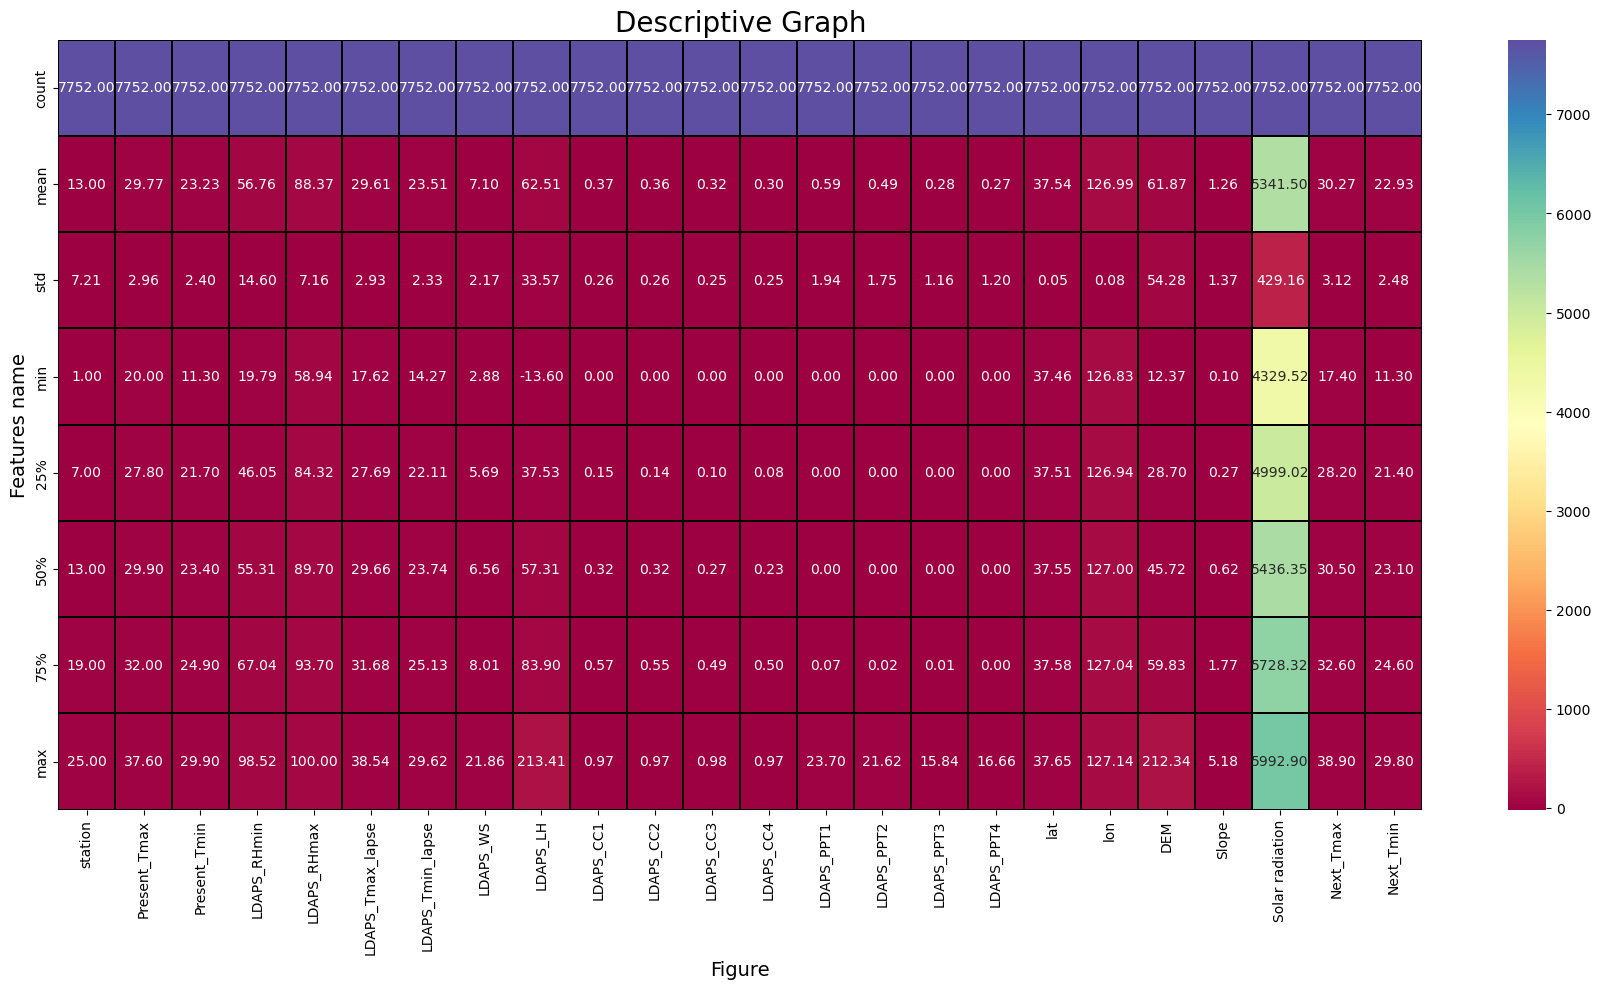

In [11]:
plt.figure(figsize=(22,10))
sns.heatmap(df.describe(), annot=True, fmt='0.2f', linewidth=0.2, linecolor='black', cmap='Spectral')    
plt.xlabel('Figure', fontsize=14)
plt.ylabel('Features name', fontsize=14)
plt.title('Descriptive Graph', fontsize=20)
plt.show()

In [12]:
#Checking for unique values
df.nunique()

station               25
Date                 310
Present_Tmax         168
Present_Tmin         156
LDAPS_RHmin         7673
LDAPS_RHmax         7665
LDAPS_Tmax_lapse    7676
LDAPS_Tmin_lapse    7676
LDAPS_WS            7676
LDAPS_LH            7676
LDAPS_CC1           7570
LDAPS_CC2           7583
LDAPS_CC3           7600
LDAPS_CC4           7525
LDAPS_PPT1          2813
LDAPS_PPT2          2511
LDAPS_PPT3          2357
LDAPS_PPT4          1919
lat                   12
lon                   25
DEM                   25
Slope                 27
Solar radiation     1575
Next_Tmax            184
Next_Tmin            158
dtype: int64

We can see there are a lot of unique values present in each column.

In [13]:
#Checking the value count for each column
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

13.0    312
14.0    310
24.0    310
23.0    310
22.0    310
21.0    310
20.0    310
19.0    310
18.0    310
17.0    310
16.0    310
15.0    310
1.0     310
2.0     310
12.0    310
11.0    310
10.0    310
9.0     310
8.0     310
7.0     310
6.0     310
5.0     310
4.0     310
3.0     310
25.0    310
Name: station, dtype: int64


30-06-2013    25
18-07-2016    25
25-07-2016    25
24-07-2016    25
23-07-2016    25
              ..
09-08-2014    25
08-08-2014    25
07-08-2014    25
06-08-2014    25
30-08-2017    25
Name: Date, Length: 310, dtype: int64


31.4    112
29.4    111
29.1    108
29.7    107
31.9    105
       ... 
36.9      1
21.2      1
20.1      1
36.4      1
20.3      1
Name: Present_Tmax, Length: 168, dtype: int64


24.0    161
23.8    153
23.1    144
23.5    143
23.3    142
       ... 
13.6      1
14.2      1
29.1      1
29.7      1
15.0      1
Name: Present_Tmin, Length: 156, dtype: int64


56.759372    75
77.030350     2
98.524734     2
19.794666     2
51.810596     2
   

We can see no null valeus or white spaces here. 

From the above info() method we saw that Date column contains object data. So we have to change it.

In [14]:
#Converting Date column from object data type to datetime
df['Date'] = pd.to_datetime(df.Date, format = '%d-%m-%Y')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   station           7752 non-null   float64       
 1   Date              7750 non-null   datetime64[ns]
 2   Present_Tmax      7752 non-null   float64       
 3   Present_Tmin      7752 non-null   float64       
 4   LDAPS_RHmin       7752 non-null   float64       
 5   LDAPS_RHmax       7752 non-null   float64       
 6   LDAPS_Tmax_lapse  7752 non-null   float64       
 7   LDAPS_Tmin_lapse  7752 non-null   float64       
 8   LDAPS_WS          7752 non-null   float64       
 9   LDAPS_LH          7752 non-null   float64       
 10  LDAPS_CC1         7752 non-null   float64       
 11  LDAPS_CC2         7752 non-null   float64       
 12  LDAPS_CC3         7752 non-null   float64       
 13  LDAPS_CC4         7752 non-null   float64       
 14  LDAPS_PPT1        7752 n

We have successfully changed the Date column to datetime.

In [15]:
#Setting Date as DataFrame Index
df.set_index('Date', inplace=True)
df

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
Date                                                                        
2013-06-30      1.0          28.7          21.4    58.255688    91.116364   
2013-06-30      2.0          31.9          21.6    52.263397    90.604721   
2013-06-30      3.0          31.6          23.3    48.690479    83.973587   
2013-06-30      4.0          32.0          23.4    58.239788    96.483688   
2013-06-30      5.0          31.4          21.9    56.174095    90.155128   
...             ...           ...           ...          ...          ...   
2017-08-30     23.0          23.3          17.1    26.741310    78.869858   
2017-08-30     24.0          23.3          17.7    24.040634    77.294975   
2017-08-30     25.0          23.2          17.4    22.933014    77.243744   
NaT            13.0          20.0          11.3    19.794666    58.936283   
NaT            13.0          37.6          29.9    98.524734   100.000153   

            LDAPS_Tmax_lapse  LDAPS_Tmin_lapse   LDAPS_WS    LDAPS_LH  \
Date                                                                    
2013-06-30         28.074101         23.006936   6.818887   69.451805   
2013-06-30         29.850689         24.035009   5.691890   51.937448   
2013-06-30         30.091292         24.565633   6.138224   20.573050   
2013-06-30         29.704629         23.326177   5.650050   65.727144   
2013-06-30         29.113934         23.486480   5.735004  107.965535   
...                      ...               ...        ...         ...   
2017-08-30         26.352081         18.775678   6.148918   72.058294   
2017-08-30         27.010193         18.733519   6.542819   47.241457   
2017-08-30         27.939516         18.522965   7.289264    9.090034   
NaT                17.624954         14.272646   2.882580  -13.603212   
NaT                38.542255         29.619342  21.857621  213.414006   

            LDAPS_CC1  ...  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4      lat  \
Date                   ...                                                
2013-06-30   0.233947  ...    0.000000    0.000000    0.000000  37.6046   
2013-06-30   0.225508  ...    0.000000    0.000000    0.000000  37.6046   
2013-06-30   0.209344  ...    0.000000    0.000000    0.000000  37.5776   
2013-06-30   0.216372  ...    0.000000    0.000000    0.000000  37.6450   
2013-06-30   0.151407  ...    0.000000    0.000000    0.000000  37.5507   
...               ...  ...         ...         ...         ...      ...   
2017-08-30   0.030034  ...    0.000000    0.000000    0.000000  37.5372   
2017-08-30   0.035874  ...    0.000000    0.000000    0.000000  37.5237   
2017-08-30   0.048954  ...    0.000000    0.000000    0.000000  37.5237   
NaT          0.000000  ...    0.000000    0.000000    0.000000  37.4562   
NaT          0.967277  ...   21.621661   15.841235   16.655469  37.6450   

                lon       DEM     Slope  Solar radiation  Next_Tmax  Next_Tmin  
Date                                                                            
2013-06-30  126.991  212.3350  2.785000      5992.895996       29.1       21.2  
2013-06-30  127.032   44.7624  0.514100      5869.312500       30.5       22.5  
2013-06-30  127.058   33.3068  0.266100      5863.555664       31.1       23.9  
2013-06-30  127.022   45.7160  2.534800      5856.964844       31.7       24.3  
2013-06-30  127.135   35.0380  0.505500      5859.552246       31.2       22.5  
...             ...       ...       ...              ...        ...        ...  
2017-08-30  126.891   15.5876  0.155400      4443.313965       28.3       18.1  
2017-08-30  126.909   17.2956  0.222300      4438.373535       28.6       18.8  
2017-08-30  126.970   19.5844  0.271300      4451.345215       27.8       17.4  
NaT         126.826   12.3700  0.098475      4329.520508       17.4       11.3  
NaT         127.135  212.3350  5.178230      5992.895996       38.9       29.8  

[7752 rows x 24 columns]

In [16]:
#Checking for duplicate values in the dataset
print("Total duplicate values are :", df.duplicated().sum())

Total duplicate values are : 0


### Data Visualization

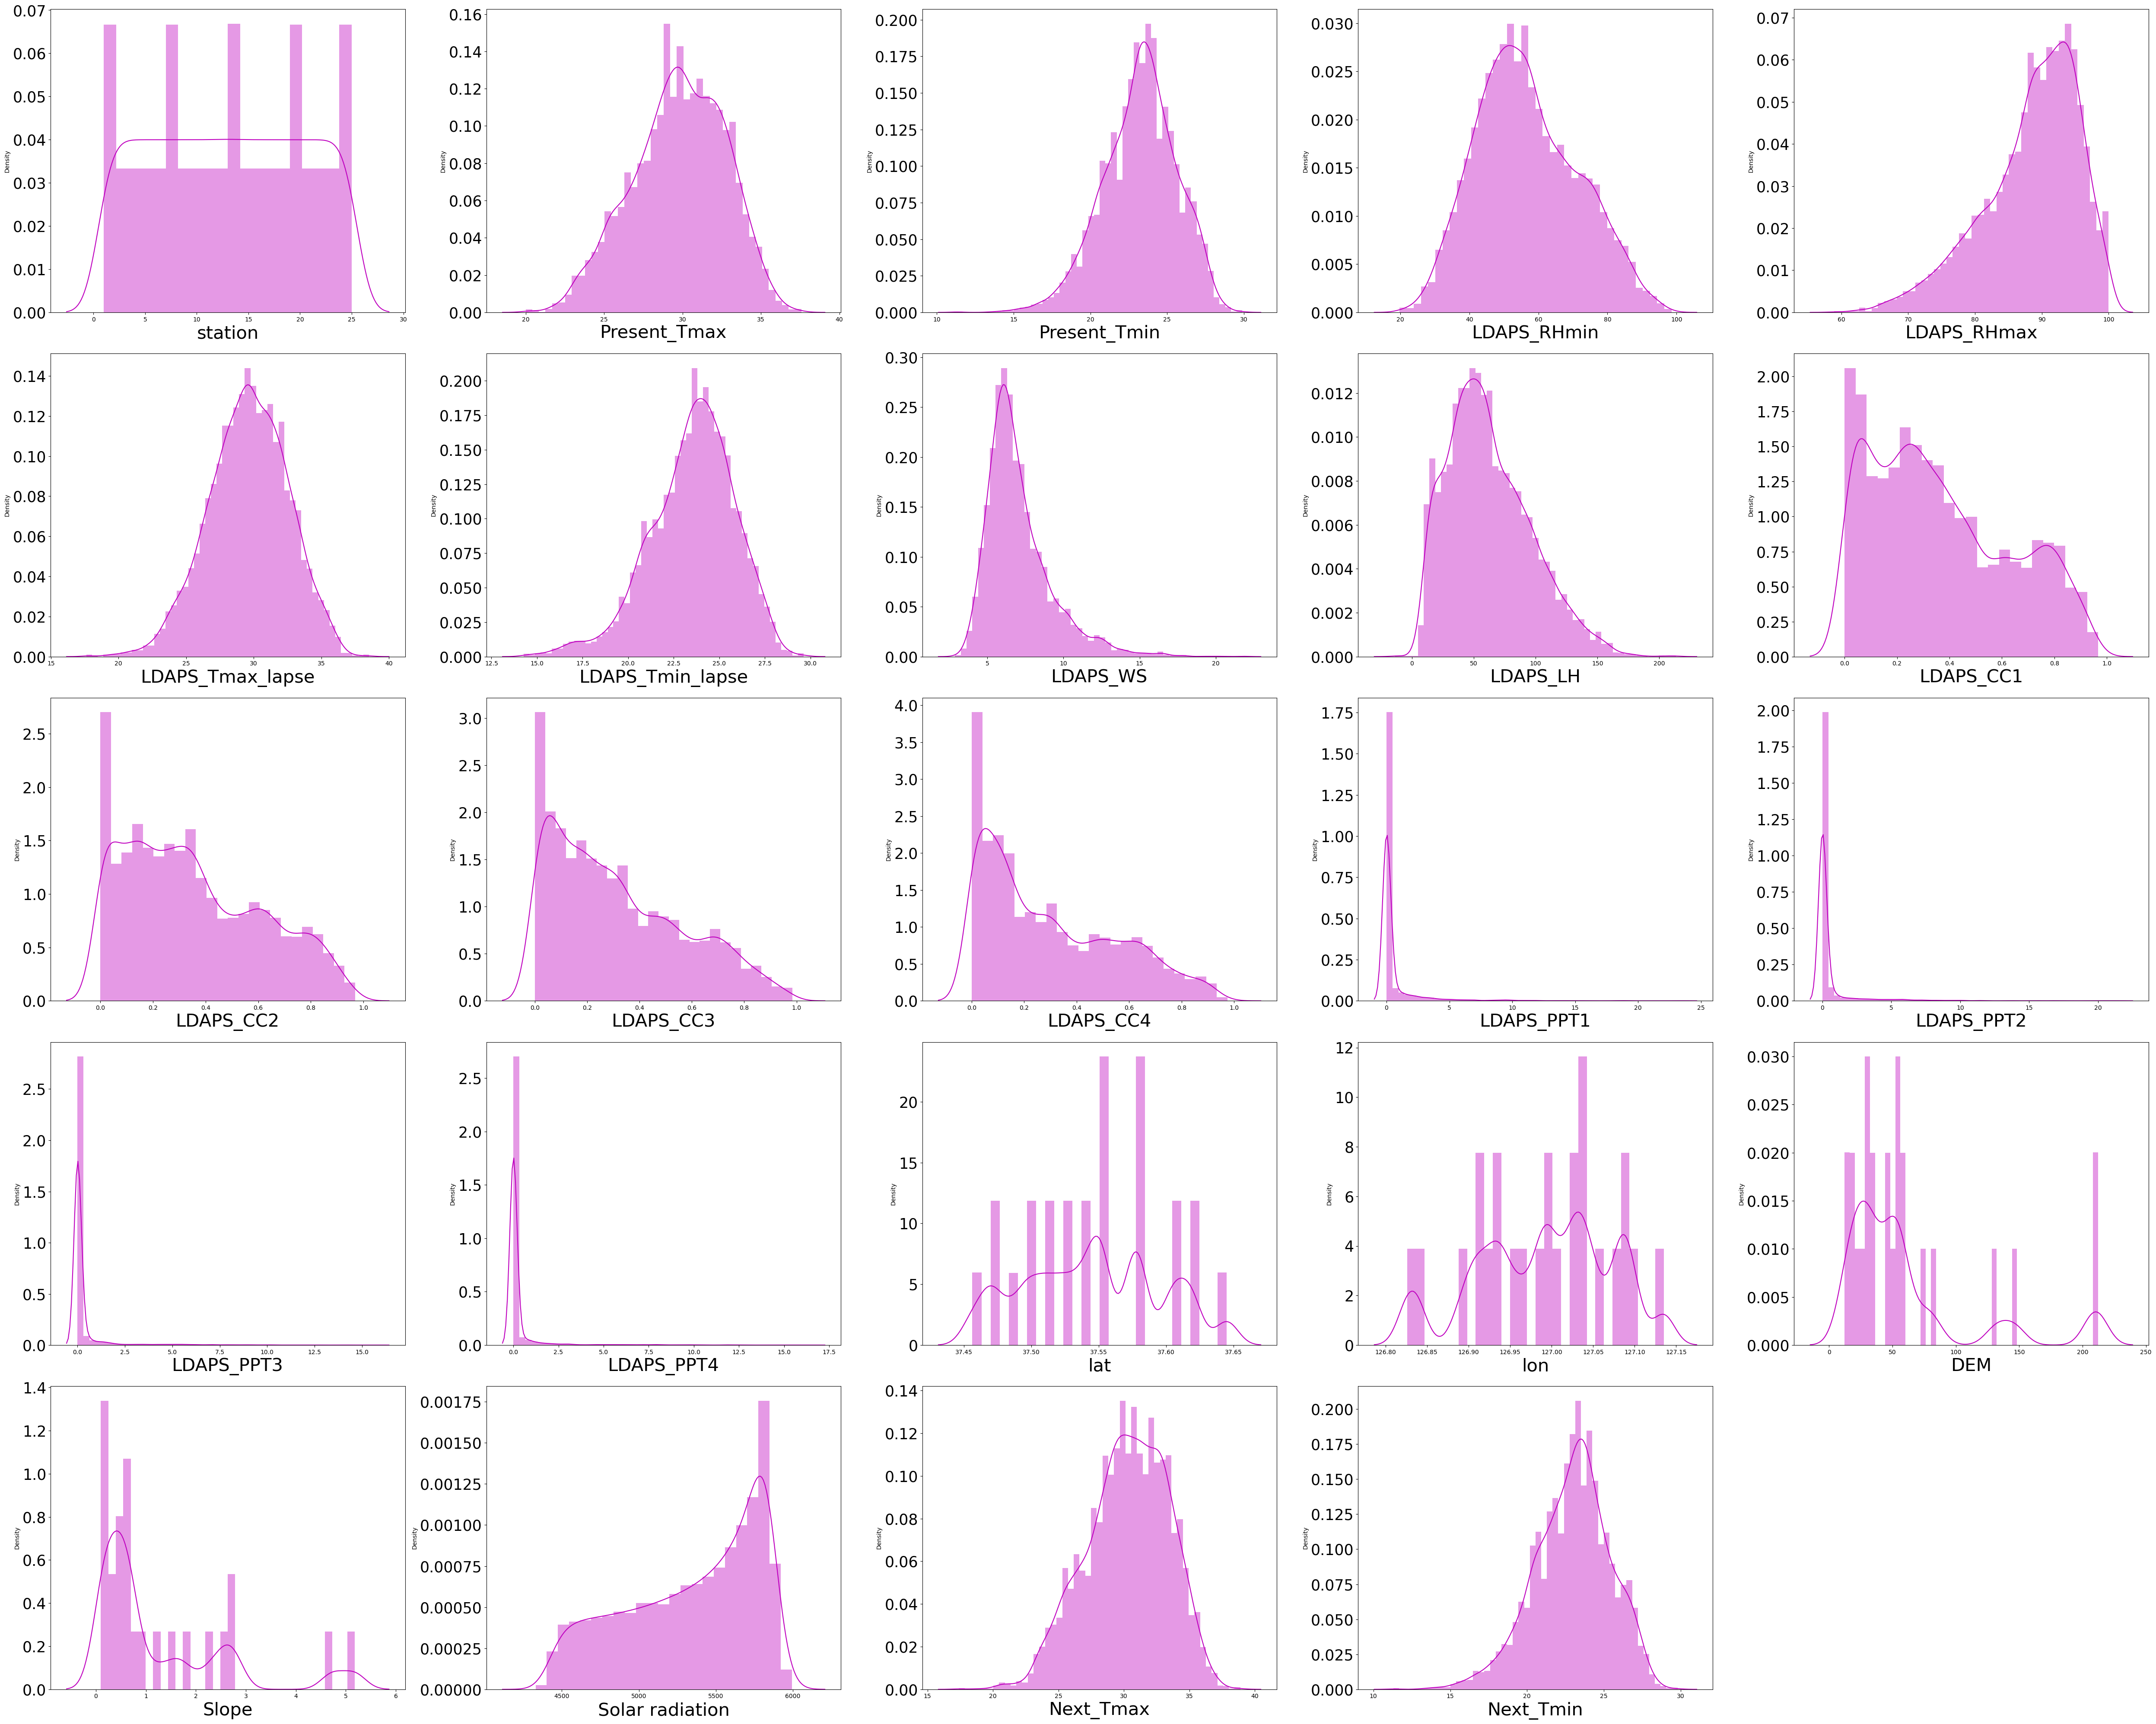

In [17]:
#Visualizing data using dist plot
plt.figure(figsize= (50,40), facecolor='white')
plotnumber=1
for col in df:
    if plotnumber<=24:
        ax = plt.subplot(5,5, plotnumber)
        sns.distplot(df[col], color = "m")
        plt.xlabel(col, fontsize = 30)
        plt.yticks(rotation=0, fontsize=25)
    plotnumber+=1
    plt.tight_layout()

We can notice the presence of outliers here. Let's deal with them later.

### Correlation between features

In [18]:
df.corr()

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
station           1.000000      0.112655      0.131646    -0.066733   
Present_Tmax      0.112655      1.000000      0.618760    -0.204571   
Present_Tmin      0.131646      0.618760      1.000000     0.123143   
LDAPS_RHmin      -0.066733     -0.204571      0.123143     1.000000   
LDAPS_RHmax      -0.166984     -0.301787     -0.015140     0.579141   
LDAPS_Tmax_lapse  0.069107      0.570129      0.464151    -0.564580   
LDAPS_Tmin_lapse  0.104758      0.623496      0.762993     0.089476   
LDAPS_WS          0.005277     -0.121820     -0.034675     0.294361   
LDAPS_LH         -0.133357      0.135463     -0.009258    -0.070858   
LDAPS_CC1         0.006919     -0.311805      0.084447     0.613818   
LDAPS_CC2         0.003396     -0.213791      0.090263     0.745443   
LDAPS_CC3         0.000694     -0.144018     -0.002772     0.689679   
LDAPS_CC4         0.006126     -0.140729     -0.044335     0.514075   
LDAPS_PPT1       -0.002709     -0.109006      0.112845     0.262665   
LDAPS_PPT2       -0.008250     -0.099449      0.068176     0.390967   
LDAPS_PPT3       -0.012461     -0.120367     -0.046126     0.240642   
LDAPS_PPT4       -0.010401     -0.099607     -0.062965     0.168595   
lat              -0.237502     -0.052615     -0.078475     0.087099   
lon              -0.118704      0.009020     -0.043461    -0.076237   
DEM              -0.255830     -0.187121     -0.250275     0.102115   
Slope            -0.090061     -0.105809     -0.146339     0.123744   
Solar radiation  -0.019001     -0.025439      0.053578     0.244080   
Next_Tmax         0.107983      0.610348      0.471806    -0.437898   
Next_Tmin         0.128293      0.622741      0.796670     0.095019   

                  LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS  \
station             -0.166984          0.069107          0.104758  0.005277   
Present_Tmax        -0.301787          0.570129          0.623496 -0.121820   
Present_Tmin        -0.015140          0.464151          0.762993 -0.034675   
LDAPS_RHmin          0.579141         -0.564580          0.089476  0.294361   
LDAPS_RHmax          1.000000         -0.373404         -0.114143  0.135333   
LDAPS_Tmax_lapse    -0.373404          1.000000          0.654021 -0.311996   
LDAPS_Tmin_lapse    -0.114143          0.654021          1.000000 -0.130035   
LDAPS_WS             0.135333         -0.311996         -0.130035  1.000000   
LDAPS_LH             0.238579          0.048010         -0.134761  0.006711   
LDAPS_CC1            0.436652         -0.438439          0.010901  0.289445   
LDAPS_CC2            0.391330         -0.523619          0.047727  0.261090   
LDAPS_CC3            0.226957         -0.541327         -0.044018  0.242991   
LDAPS_CC4            0.130619         -0.429539         -0.080335  0.220533   
LDAPS_PPT1           0.268449         -0.111065          0.038056  0.152587   
LDAPS_PPT2           0.229050         -0.242122          0.000870  0.191886   
LDAPS_PPT3           0.134607         -0.188115         -0.088575  0.161684   
LDAPS_PPT4           0.117853         -0.160273         -0.094655  0.144085   
lat                  0.195798         -0.042093         -0.096257  0.036657   
lon                  0.025667          0.090666         -0.026701 -0.059466   
DEM                  0.177168         -0.178895         -0.195455  0.191053   
Slope                0.219599         -0.162332         -0.185849  0.171629   
Solar radiation      0.149261          0.047971          0.159975  0.121759   
Next_Tmax           -0.283738          0.827189          0.586983 -0.342729   
Next_Tmin           -0.071997          0.586868          0.880176 -0.096576   

                  LDAPS_LH  LDAPS_CC1  ...  LDAPS_PPT2  LDAPS_PPT3  \
station          -0.133357   0.006919  ...   -0.008250   -0.012461   
Present_Tmax      0.135463  -0.311805  ...   -0.099449   -0.120367   
Present_Tmin     -0.009258   0.084447  ...    0.068176   

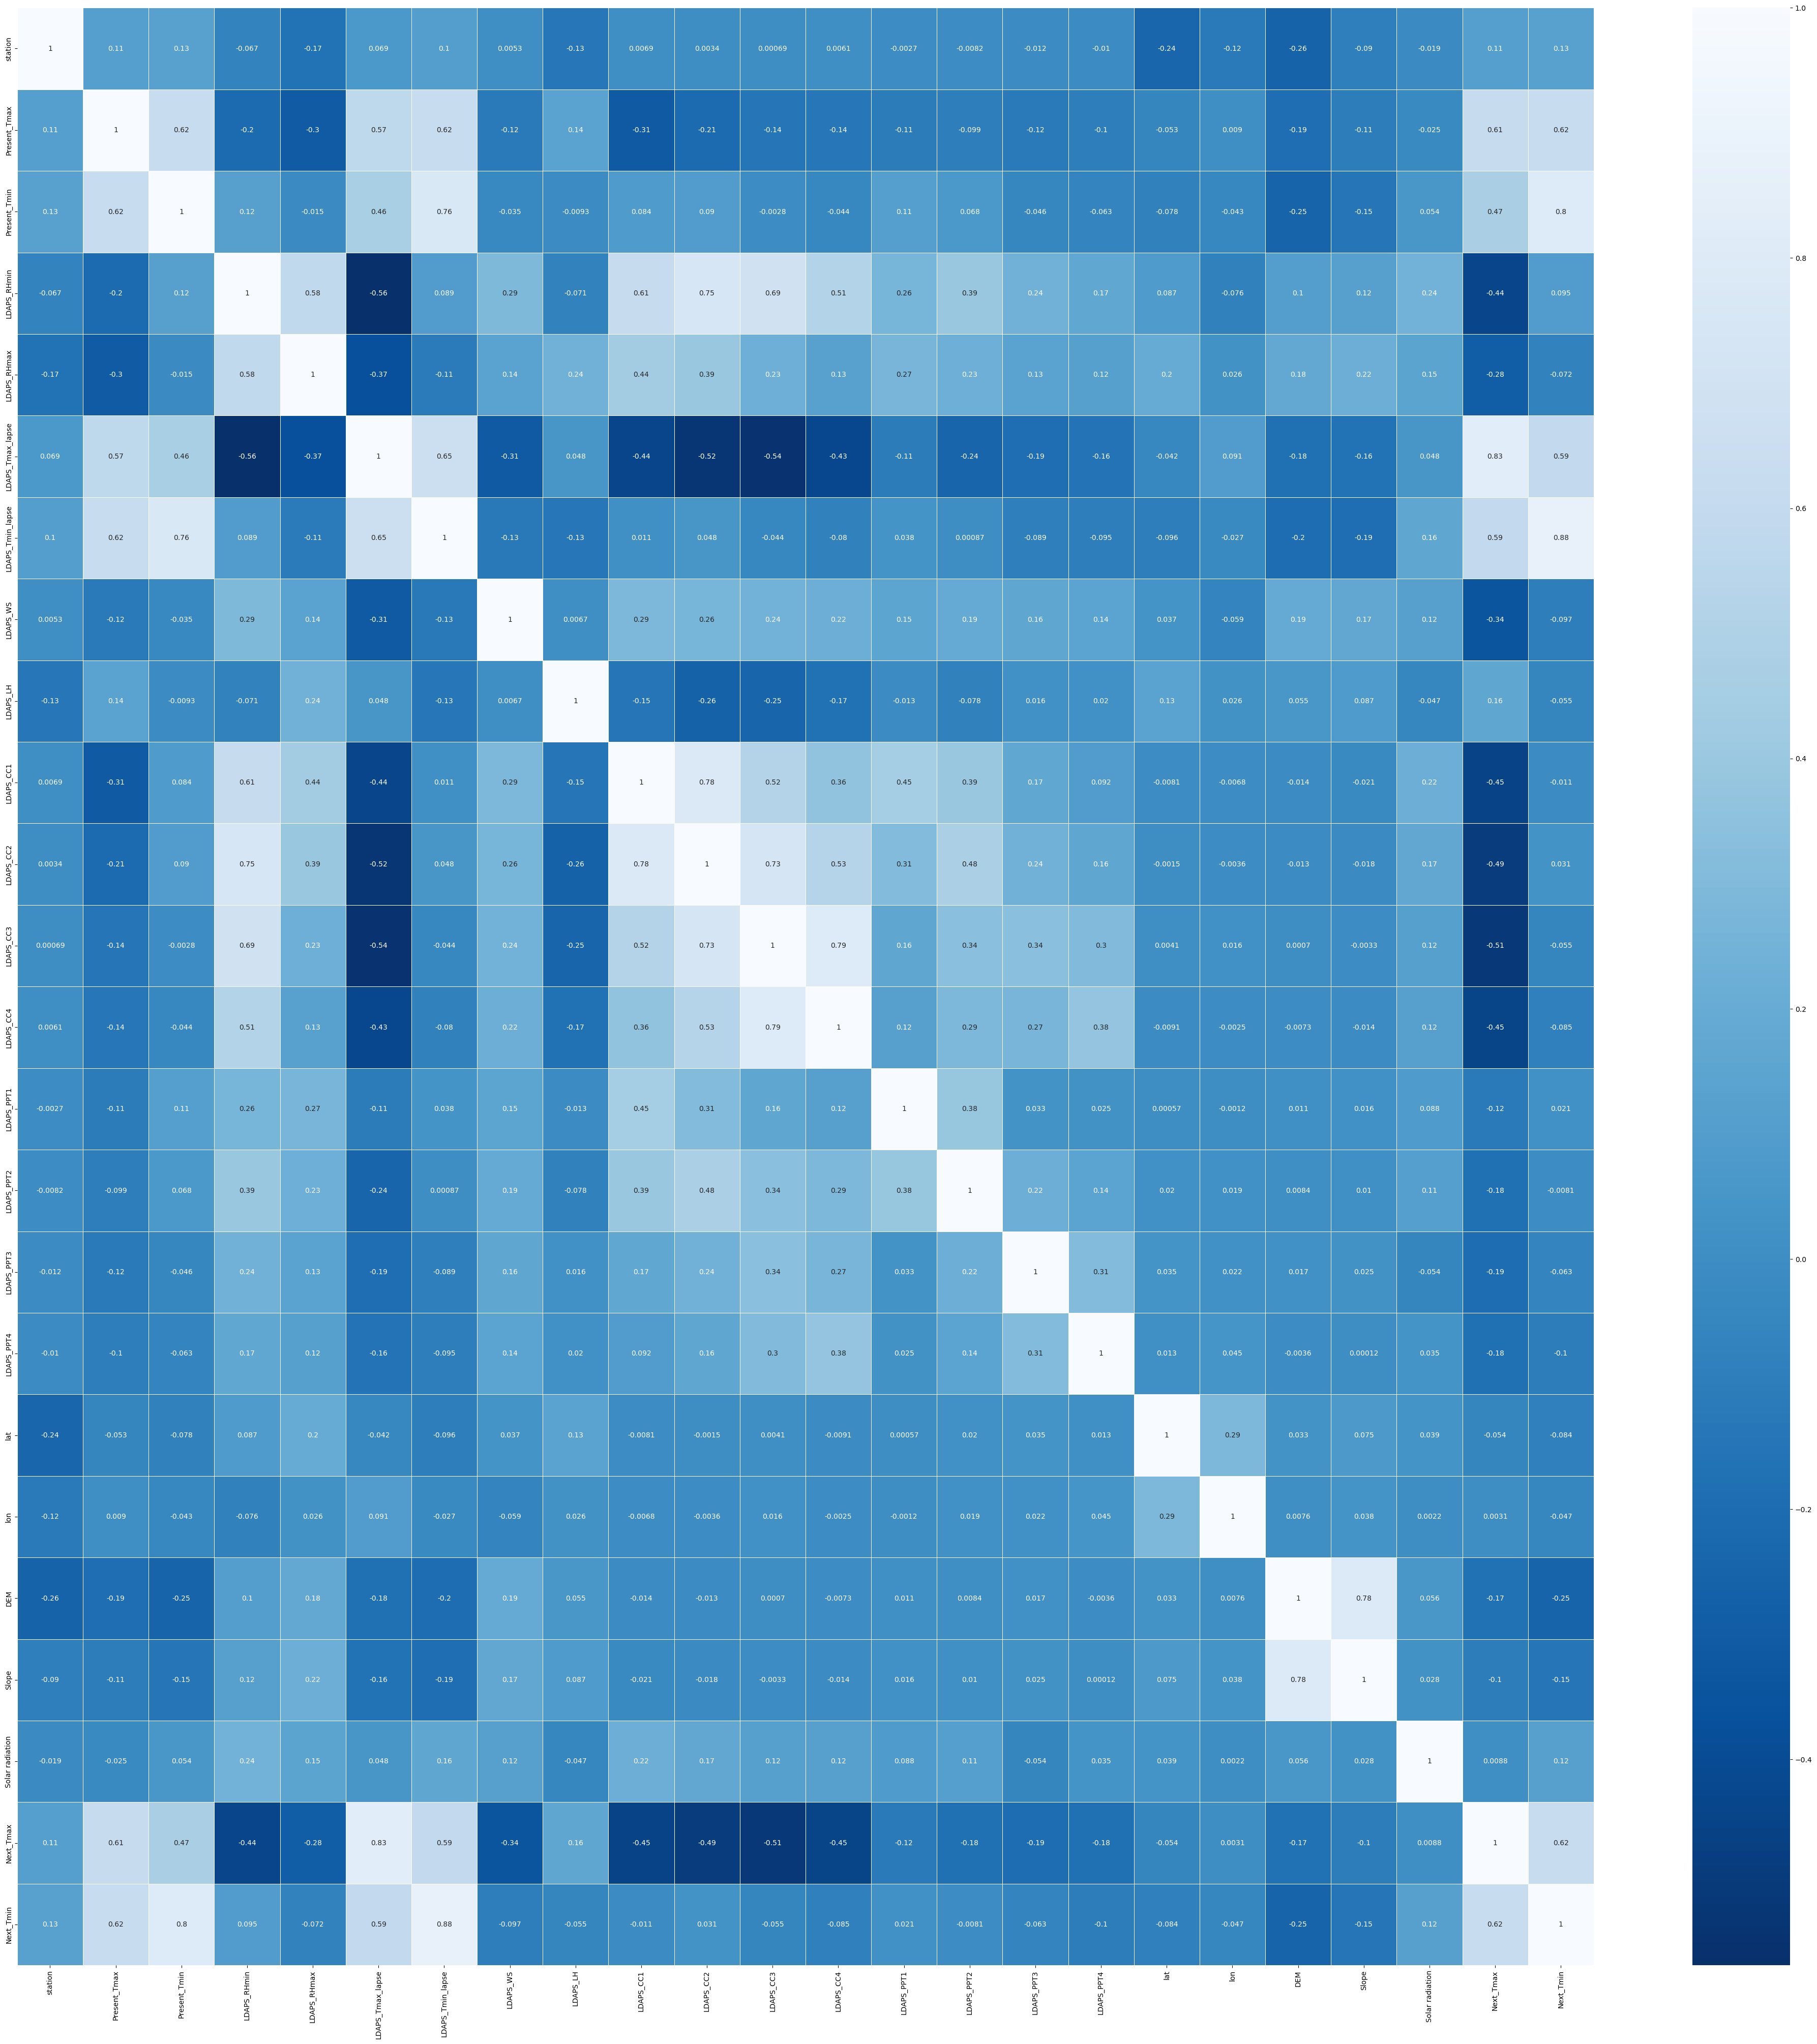

In [19]:
#Let's plot a heatmap for visualizing the correlation between features and label
plt.figure(figsize=(50, 50))
sns.heatmap(df.corr(), annot=True, linewidth=0.5, cmap='Blues_r')
plt.show()

From the correlation heatmap we can notice that the label i.e. Next_Tmin has positive correlations with Present_Tmax 62%, LDAPS_Tmax_lapse 59%, LDAPS_Tmin_lapse 88%, Solar radiation 12%, Next_Tmax 62%.

### 1) For Next_Tmin:

#### Let's do some comparision

<Axes: xlabel='station', ylabel='Next_Tmin'>

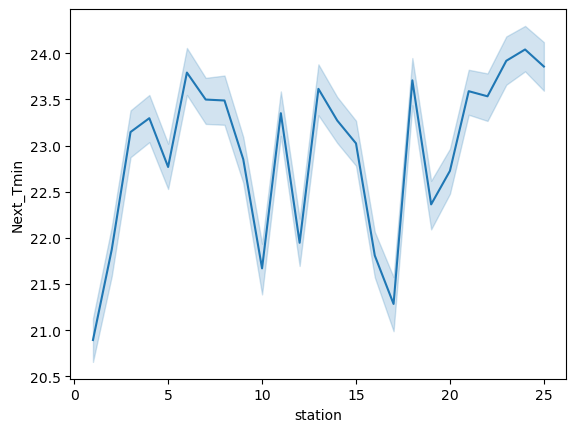

In [38]:
#Comparing Next_Tmin with station
sns.lineplot(x='station', y='Next_Tmin', data=df, palette='colorblind')

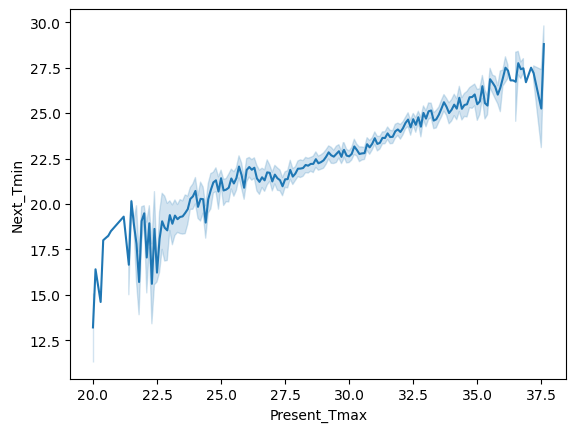

In [31]:
#Comparing Next_Tmin with Present_Tmax
sns.lineplot(x='Present_Tmax', y='Next_Tmin', data=df, palette='colorblind')
plt.show()

We can see a highly positive correlation between Present_Tmax and Next_Tmin.

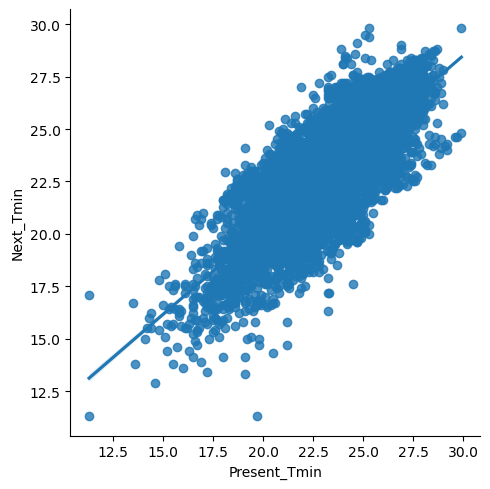

In [33]:
#Comparing Next_Tmin with Present_Tmin
sns.lmplot(x='Present_Tmin', y='Next_Tmin', data=df, palette='colorblind')
plt.show()

We can see a high positive correlation between Present_Tmin and Next_Tmin.

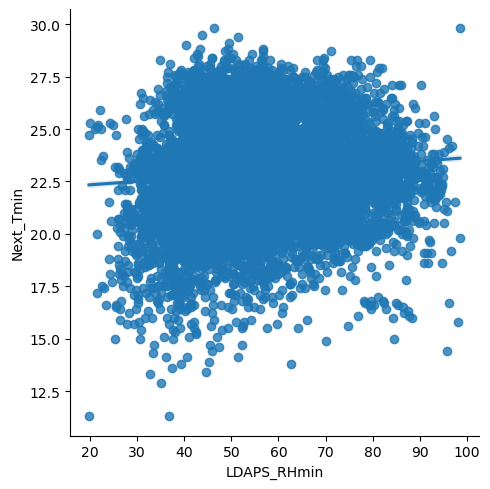

In [35]:
#Comparing Next_Tmin with LDAPS_RHmin
sns.lmplot(x='LDAPS_RHmin', y='Next_Tmin', data=df, palette='colorblind')
plt.show()

We can see a slight positive correlation between Next_Tmin and LDAPS_RHmin.

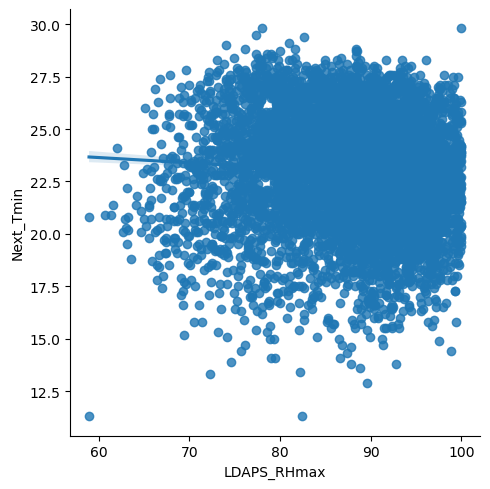

In [39]:
#Comparing Next_Tmin with LDAPS_RHmax
sns.lmplot(x='LDAPS_RHmax', y='Next_Tmin', data=df, palette='colorblind')
plt.show()

We can see a negative correlation between Next_Tmin and LDAPS_RHmax.

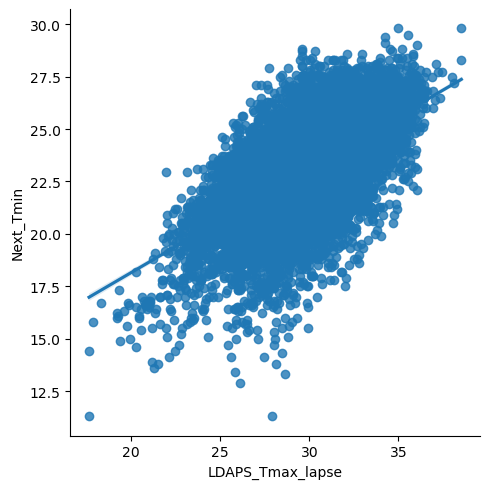

In [40]:
#Comparing Next_Tmin with LDAPS_Tmax_lapse
sns.lmplot(x='LDAPS_Tmax_lapse', y='Next_Tmin', data=df, palette='colorblind')
plt.show()

We can notice a highly positive correlation between Next_Tmin and LDAPS_Tmax_lapse.

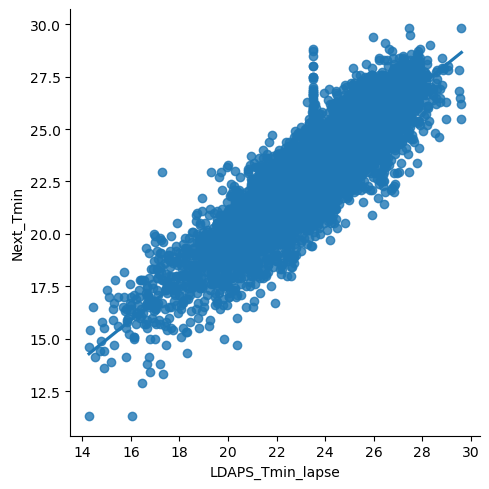

In [41]:
#Comparing Next_Tmin with LDAPS_Tmin_lapse
sns.lmplot(x='LDAPS_Tmin_lapse', y='Next_Tmin', data=df, palette='colorblind')
plt.show()

We can notice there is the highest positive correlation between Next_Tmin and LDAPS_Tmin_lapse.

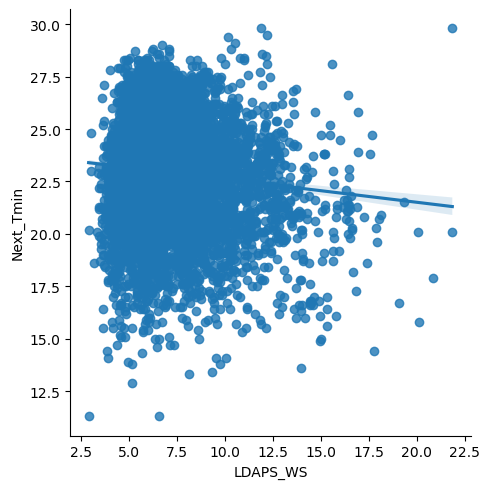

In [42]:
#Comparing Next_Tmin with LDAPS_WS
sns.lmplot(x='LDAPS_WS', y='Next_Tmin', data=df, palette='colorblind')
plt.show()

We can see a negative correlation here.

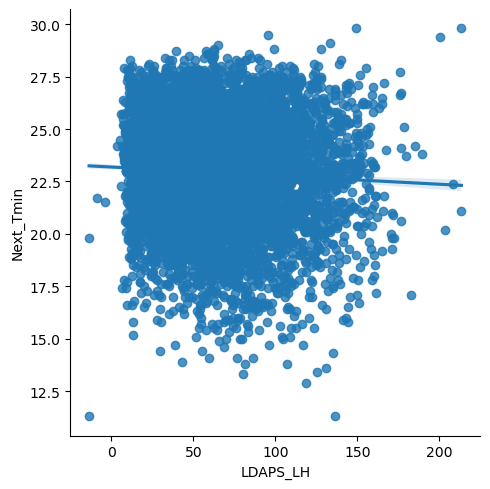

In [43]:
#Comparing Next_Tmin with LDAPS_LH
sns.lmplot(x='LDAPS_LH', y='Next_Tmin', data=df, palette='colorblind')
plt.show()

There is a negative correlation.

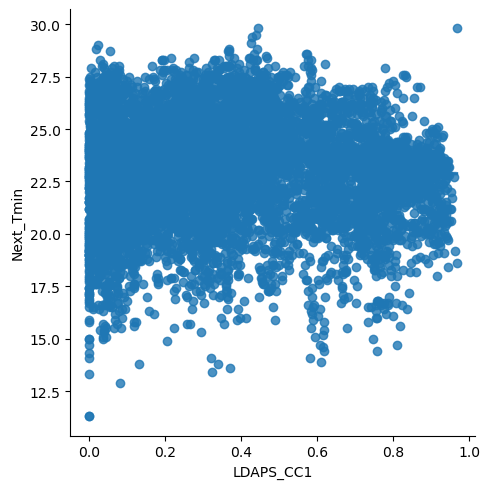

In [44]:
#Comparing Next_Tmin with LDAPS_CC1
sns.lmplot(x='LDAPS_CC1', y='Next_Tmin', data=df, palette='colorblind')
plt.show()

Negative correlation.

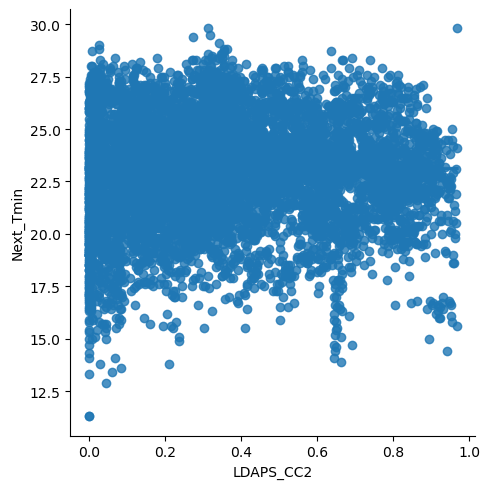

In [45]:
#Comparing Next_Tmin with LDAPS_CC2
sns.lmplot(x='LDAPS_CC2', y='Next_Tmin', data=df, palette='colorblind')
plt.show()

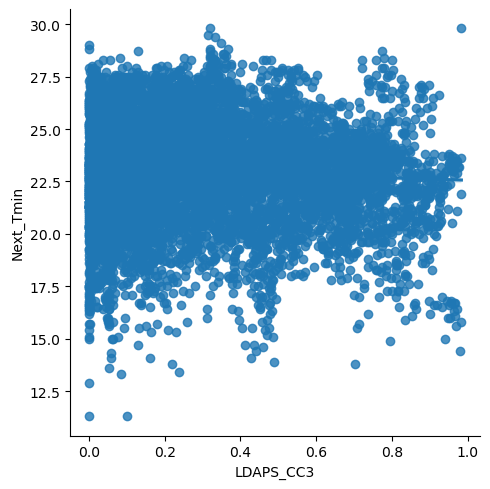

In [46]:
#Comparing Next_Tmin with LDAPS_CC3
sns.lmplot(x='LDAPS_CC3', y='Next_Tmin', data=df, palette='colorblind')
plt.show()

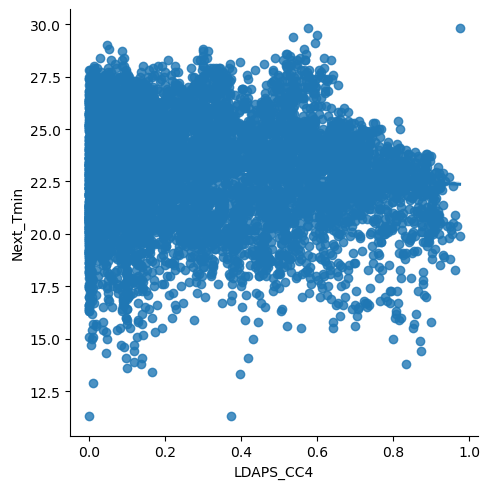

In [47]:
#Comparing Next_Tmin with LDAPS_CC4
sns.lmplot(x='LDAPS_CC4', y='Next_Tmin', data=df, palette='colorblind')
plt.show()

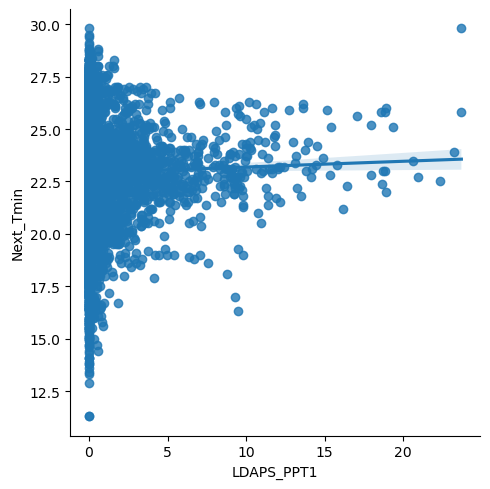

In [48]:
#Comparing Next_Tmin with LDAPS_PPT1
sns.lmplot(x='LDAPS_PPT1', y='Next_Tmin', data=df, palette='colorblind')
plt.show()

Slightly positive correlation.

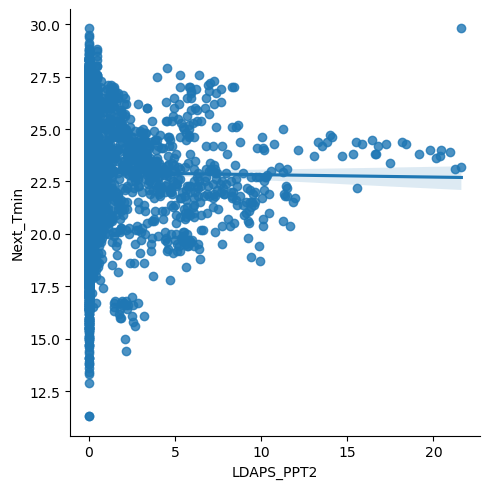

In [49]:
#Comparing Next_Tmin with LDAPS_PPT2
sns.lmplot(x='LDAPS_PPT2', y='Next_Tmin', data=df, palette='colorblind')
plt.show()

Here there is a negative correlation.

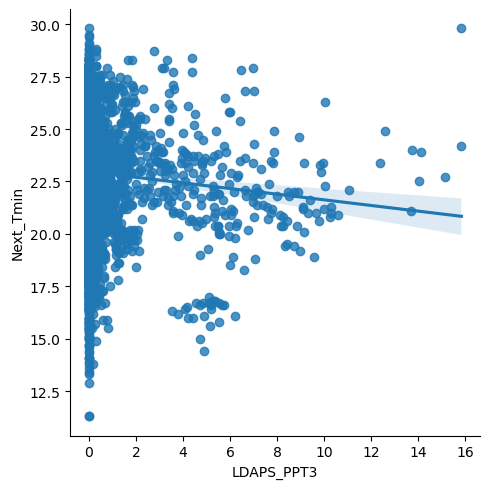

In [50]:
#Comparing Next_Tmin with LDAPS_PPT3
sns.lmplot(x='LDAPS_PPT3', y='Next_Tmin', data=df, palette='colorblind')
plt.show()

There is a negative correlation between Next_Tmin and LDAPS_PPT3.

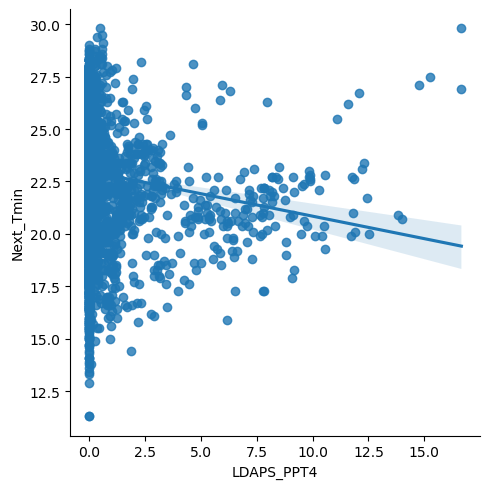

In [51]:
#Comparing Next_Tmin with LDAPS_PPT4
sns.lmplot(x='LDAPS_PPT4', y='Next_Tmin', data=df, palette='colorblind')
plt.show()

We can see a negative correlation here.

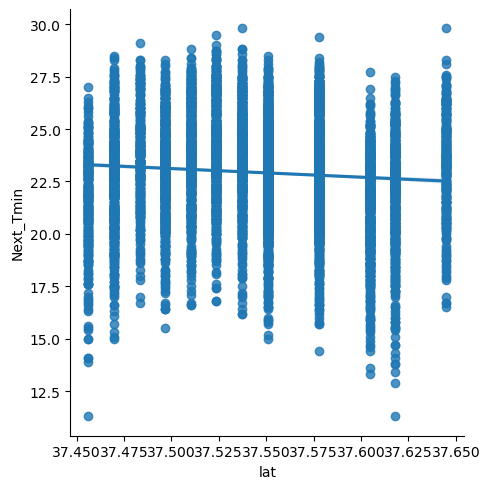

In [58]:
#Comparing Next_Tmin with lat
sns.lmplot(x='lat', y='Next_Tmin', data=df, palette='colorblind')
plt.show()

Negative correlation.

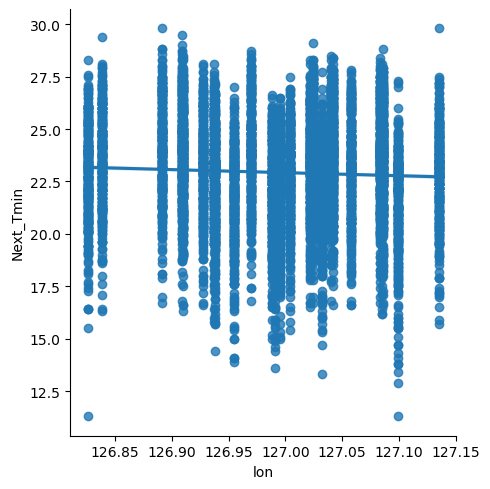

In [59]:
#Comparing Next_Tmin with lon
sns.lmplot(x='lon', y='Next_Tmin', data=df, palette='colorblind')
plt.show()

Negative correlation.

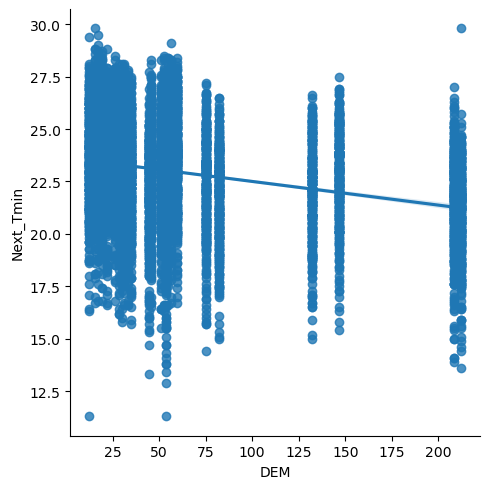

In [60]:
#Comparing Next_Tmin with DEM
sns.lmplot(x='DEM', y='Next_Tmin', data=df, palette='colorblind')
plt.show()

Negative correlation.

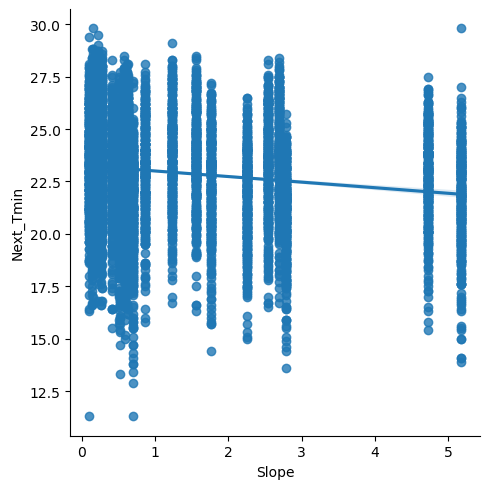

In [63]:
#Comparing Next_Tmin with Slope
sns.lmplot(x='Slope', y='Next_Tmin', data=df, palette='colorblind')
plt.show()

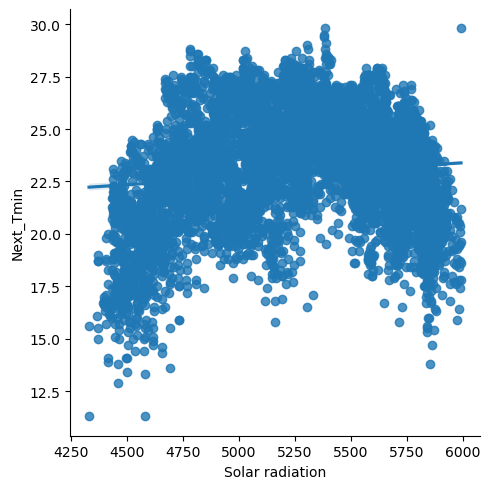

In [64]:
#Comparing Next_Tmin with Solar radiation
sns.lmplot(x='Solar radiation', y='Next_Tmin', data=df, palette='colorblind')
plt.show()

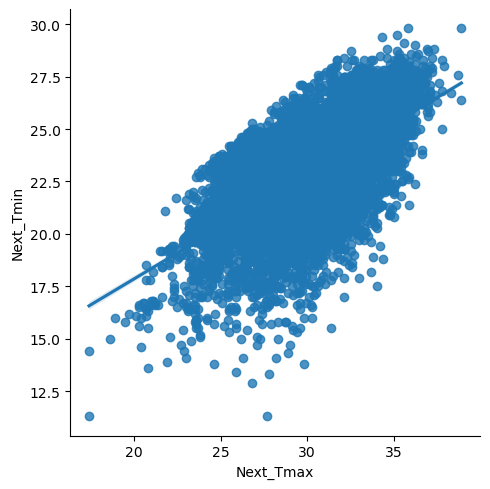

In [65]:
#Comparing Next_Tmin with Next_Tmax
sns.lmplot(x='Next_Tmax', y='Next_Tmin', data=df, palette='colorblind')
plt.show()

Here, we notice a high positive correlation between Next_Tmin and Next_Tmax.

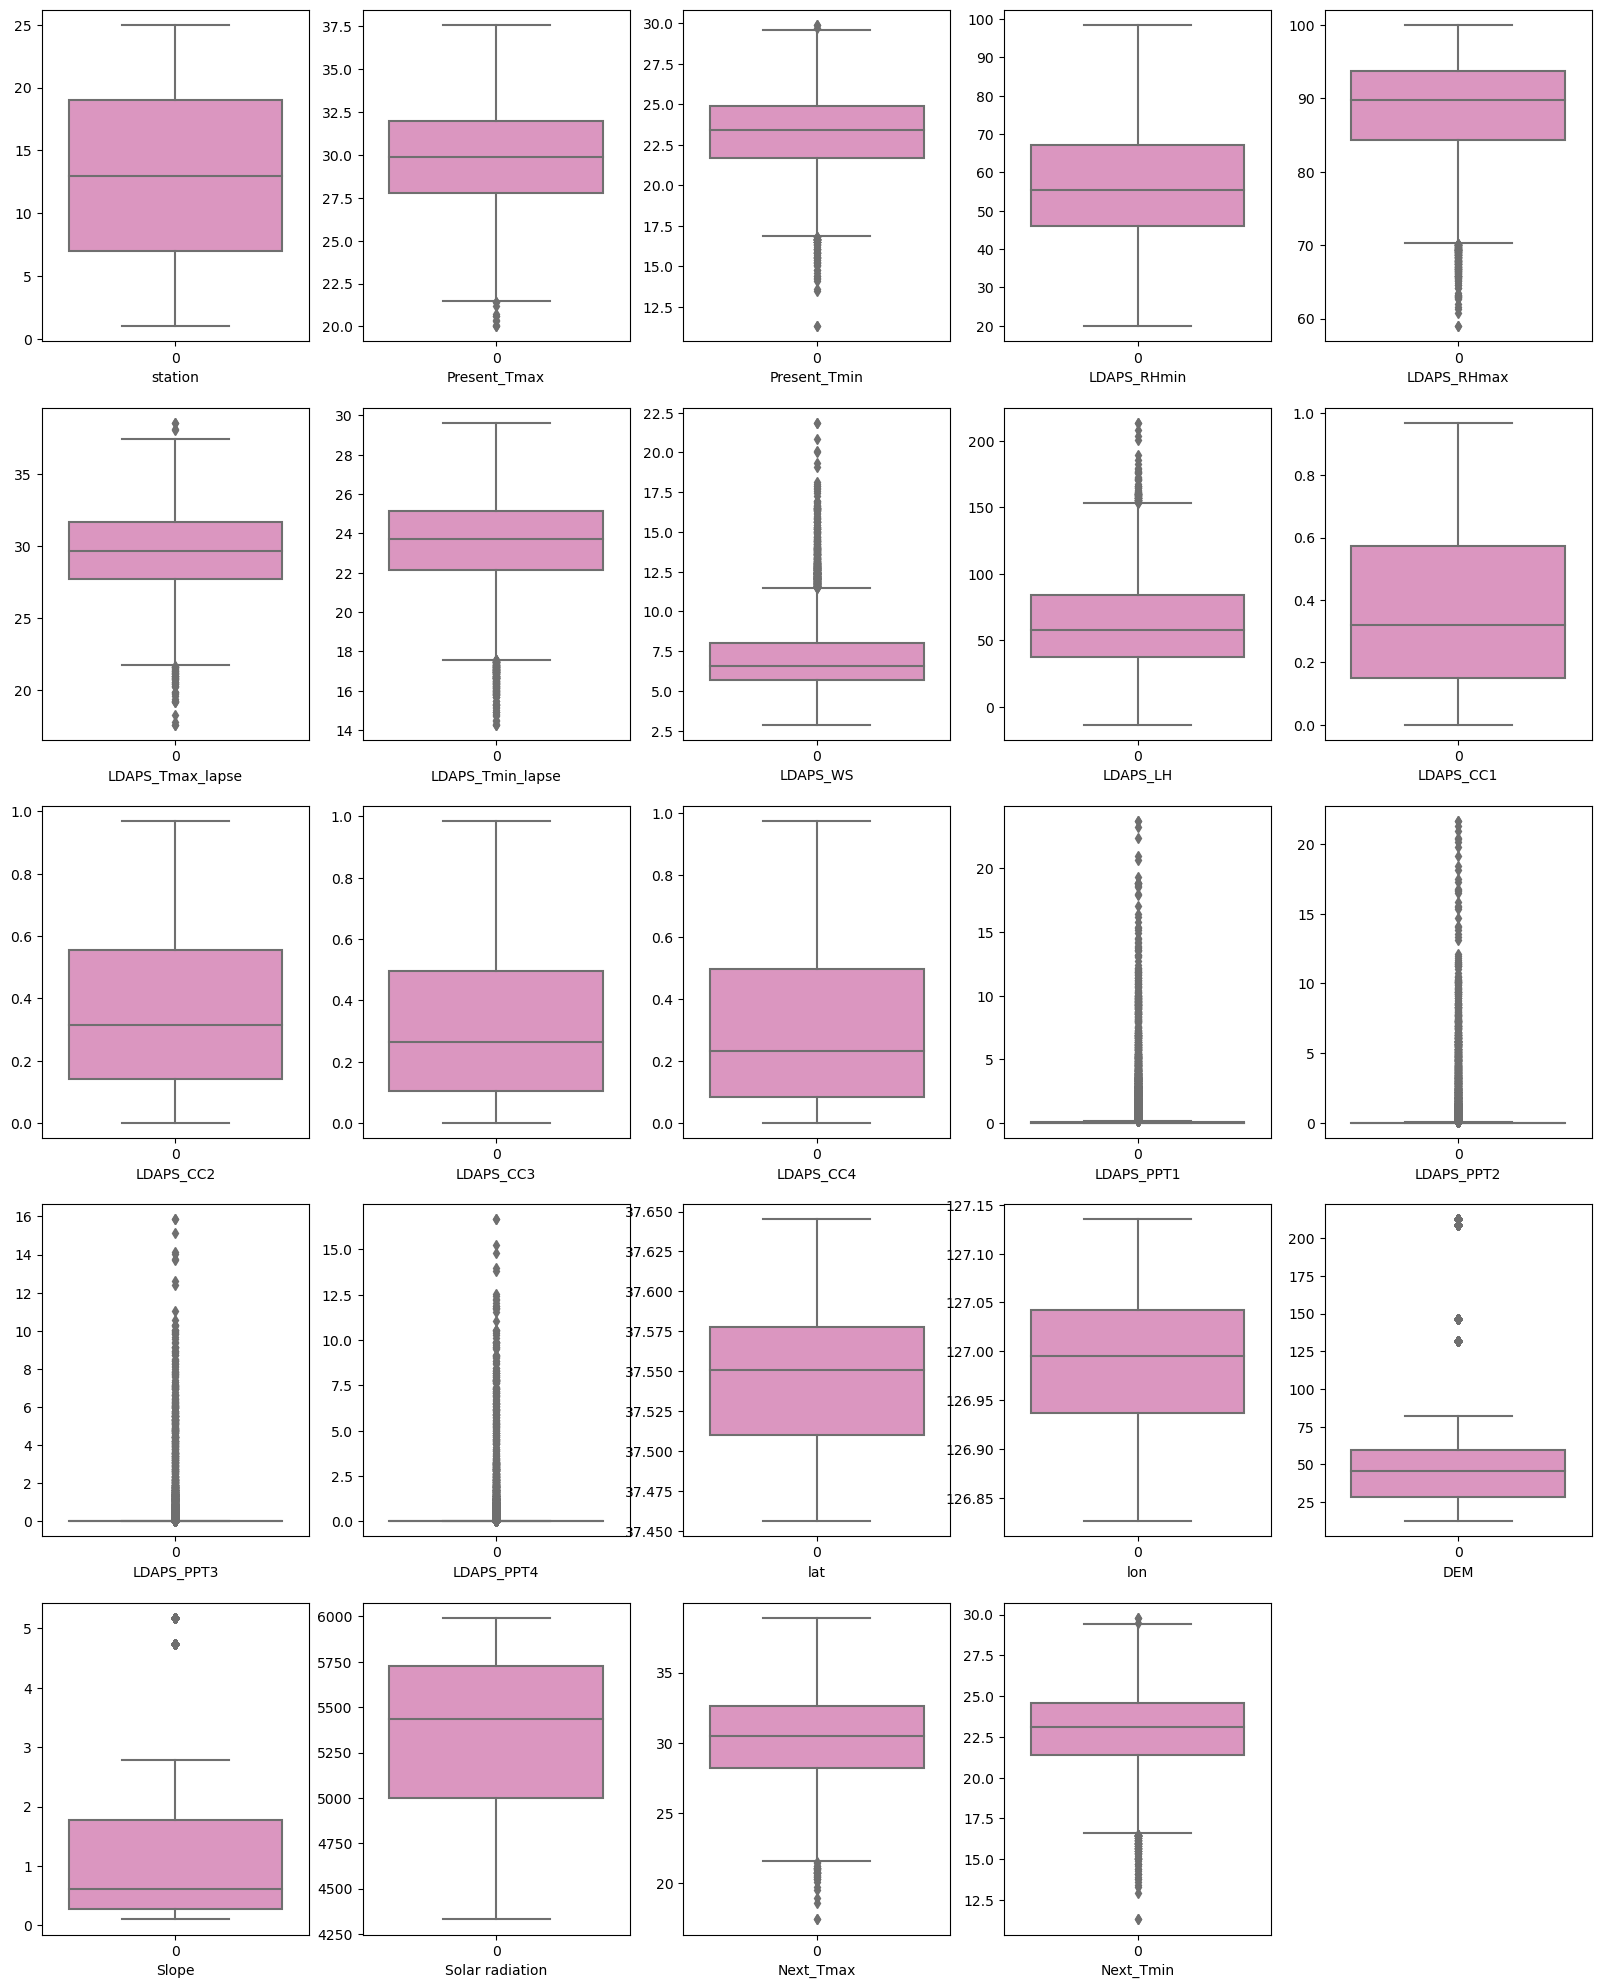

In [69]:
#Let's plot the box plot to check for the outliers

plt.figure(figsize=(20,25))
plotnumber=1
for i in df:
    if plotnumber<=24:
        plt.subplot(5,5,plotnumber)
        sns.boxplot(df[i], palette='Set2_r')
        plt.xlabel(i)
        plotnumber+=1
plt.show()         

From the above boxplot we can notice some outliers in Present_Tmax, Present_Tmin, LDAPS_RHmax, LDAPS_Tmax_lapse, LDAPS_Tmin_lapse, LDAPS_WS, LDAPS_LH, LDAPS_PPT1, LDAPS_PPT2, LDAPS_PPT3, LDAPS_PPT4, DEM, Slope, Next_Tmax and Next_Tmin. Let's deal with them.

### Z Score

In [20]:
from scipy.stats import zscore

out_features = df[['Present_Tmax', 'Present_Tmin', 'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH', 'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'DEM', 'Slope', 'Next_Tmax', 'Next_Tmin']]
z = np.abs(zscore(out_features))
z

Present_Tmax  Present_Tmin  LDAPS_RHmax  LDAPS_Tmax_lapse  \
Date                                                                    
2013-06-30      0.361326      0.759529     0.383078          0.524889   
2013-06-30      0.721084      0.676296     0.311586          0.080895   
2013-06-30      0.619608      0.031188     0.614982          0.162936   
2013-06-30      0.754909      0.072805     1.133054          0.031092   
2013-06-30      0.551957      0.551446     0.248765          0.170325   
...                  ...           ...          ...               ...   
2017-08-30      2.187892      2.549048     1.328126          1.112066   
2017-08-30      2.187892      2.299348     1.548184          0.887662   
2017-08-30      2.221718      2.424198     1.555342          0.570780   
NaT             3.304127      4.962817     4.113443          4.087857   
NaT             2.649126      2.777891     1.624409          3.044561   

            LDAPS_Tmin_lapse  LDAPS_WS  LDAPS_LH  LDAPS_PPT1  LDAPS_PPT2  \
Date                                                                       
2013-06-30          0.216663  0.128382  0.206966    0.305750    0.276489   
2013-06-30          0.223848  0.646994  0.314841    0.305750    0.276489   
2013-06-30          0.451210  0.441604  1.249283    0.305750    0.276489   
2013-06-30          0.079874  0.666247  0.095997    0.305750    0.276489   
2013-06-30          0.011187  0.627154  1.354409    0.305750    0.276489   
...                      ...       ...       ...         ...         ...   
2017-08-30          2.029679  0.436683  0.284622    0.305750    0.276489   
2017-08-30          2.047744  0.255421  0.454749    0.305750    0.276489   
2017-08-30          2.137962  0.088072  1.591397    0.305750    0.276489   
NaT                 3.959146  1.939757  2.267499    0.305750    0.276489   
NaT                 2.616632  6.792009  4.496044   11.935477   12.049552   

            LDAPS_PPT3  LDAPS_PPT4       DEM     Slope  Next_Tmax  Next_Tmin  
Date                                                                          
2013-06-30    0.240636    0.224453  2.772243  1.115004   0.376282   0.697599  
2013-06-30    0.240636    0.224453  0.315157  0.542158   0.072097   0.174064  
2013-06-30    0.240636    0.224453  0.526218  0.723133   0.264260   0.389744  
2013-06-30    0.240636    0.224453  0.297588  0.932424   0.456422   0.550832  
2013-06-30    0.240636    0.224453  0.494322  0.548433   0.296287   0.174064  
...                ...         ...       ...       ...        ...        ...  
2017-08-30    0.240636    0.224453  0.852681  0.803915   0.632499   1.946031  
2017-08-30    0.240636    0.224453  0.821213  0.755095   0.536418   1.664127  
2017-08-30    0.240636    0.224453  0.779043  0.719338   0.792634   2.227935  
NaT           0.240636    0.224453  0.911963  0.845455   4.123453   4.684525  
NaT          13.461674   13.651790  2.772243  2.861435   2.762374   2.765791  

[7752 rows x 15 columns]

In [21]:
#Thresholds
np.where(z>3)

(array([  25,   25,   26, ..., 7751, 7751, 7751], dtype=int64),
 array([ 5,  8,  8, ...,  8,  9, 10], dtype=int64))

In [22]:
z.iloc[25,8]

5.386162416797636

In [23]:
#Removing the data above Zscore and creating new df
df1= df[(z<3).all(axis=1)]
df1.shape

(6894, 24)

In [24]:
#Shape of old and new dataframe
print('Shape of Old dataframe :', df.shape)
print('Shape of New dataframe :', df1.shape)

Shape of Old dataframe : (7752, 24)
Shape of New dataframe : (6894, 24)


In [25]:
print("Data Loss Percentage :", ((df.shape[0]-df1.shape[0])/df.shape[0])*100)

Data Loss Percentage : 11.06811145510836


We can see 11% data loss here, which is acceptable.

In [26]:
df=df1

### IQR Method

In [27]:
#1st quantile
Q1 = out_features.quantile(0.25)

#3rd quantile
Q3 = out_features.quantile(0.75)

#IQR
IQR = Q3 - Q1

df2 = df[~((df < (Q1 - 1.5 * IQR))| (df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [28]:
df2.shape

(3266, 24)

In [29]:
print("Data Loss Percentage after removing outliers with IQR method :", ((df.shape[0]-df2.shape[0])/df.shape[0])*100)

Data Loss Percentage after removing outliers with IQR method : 52.62547142442704


This is way too much data loss which is not acceptable.

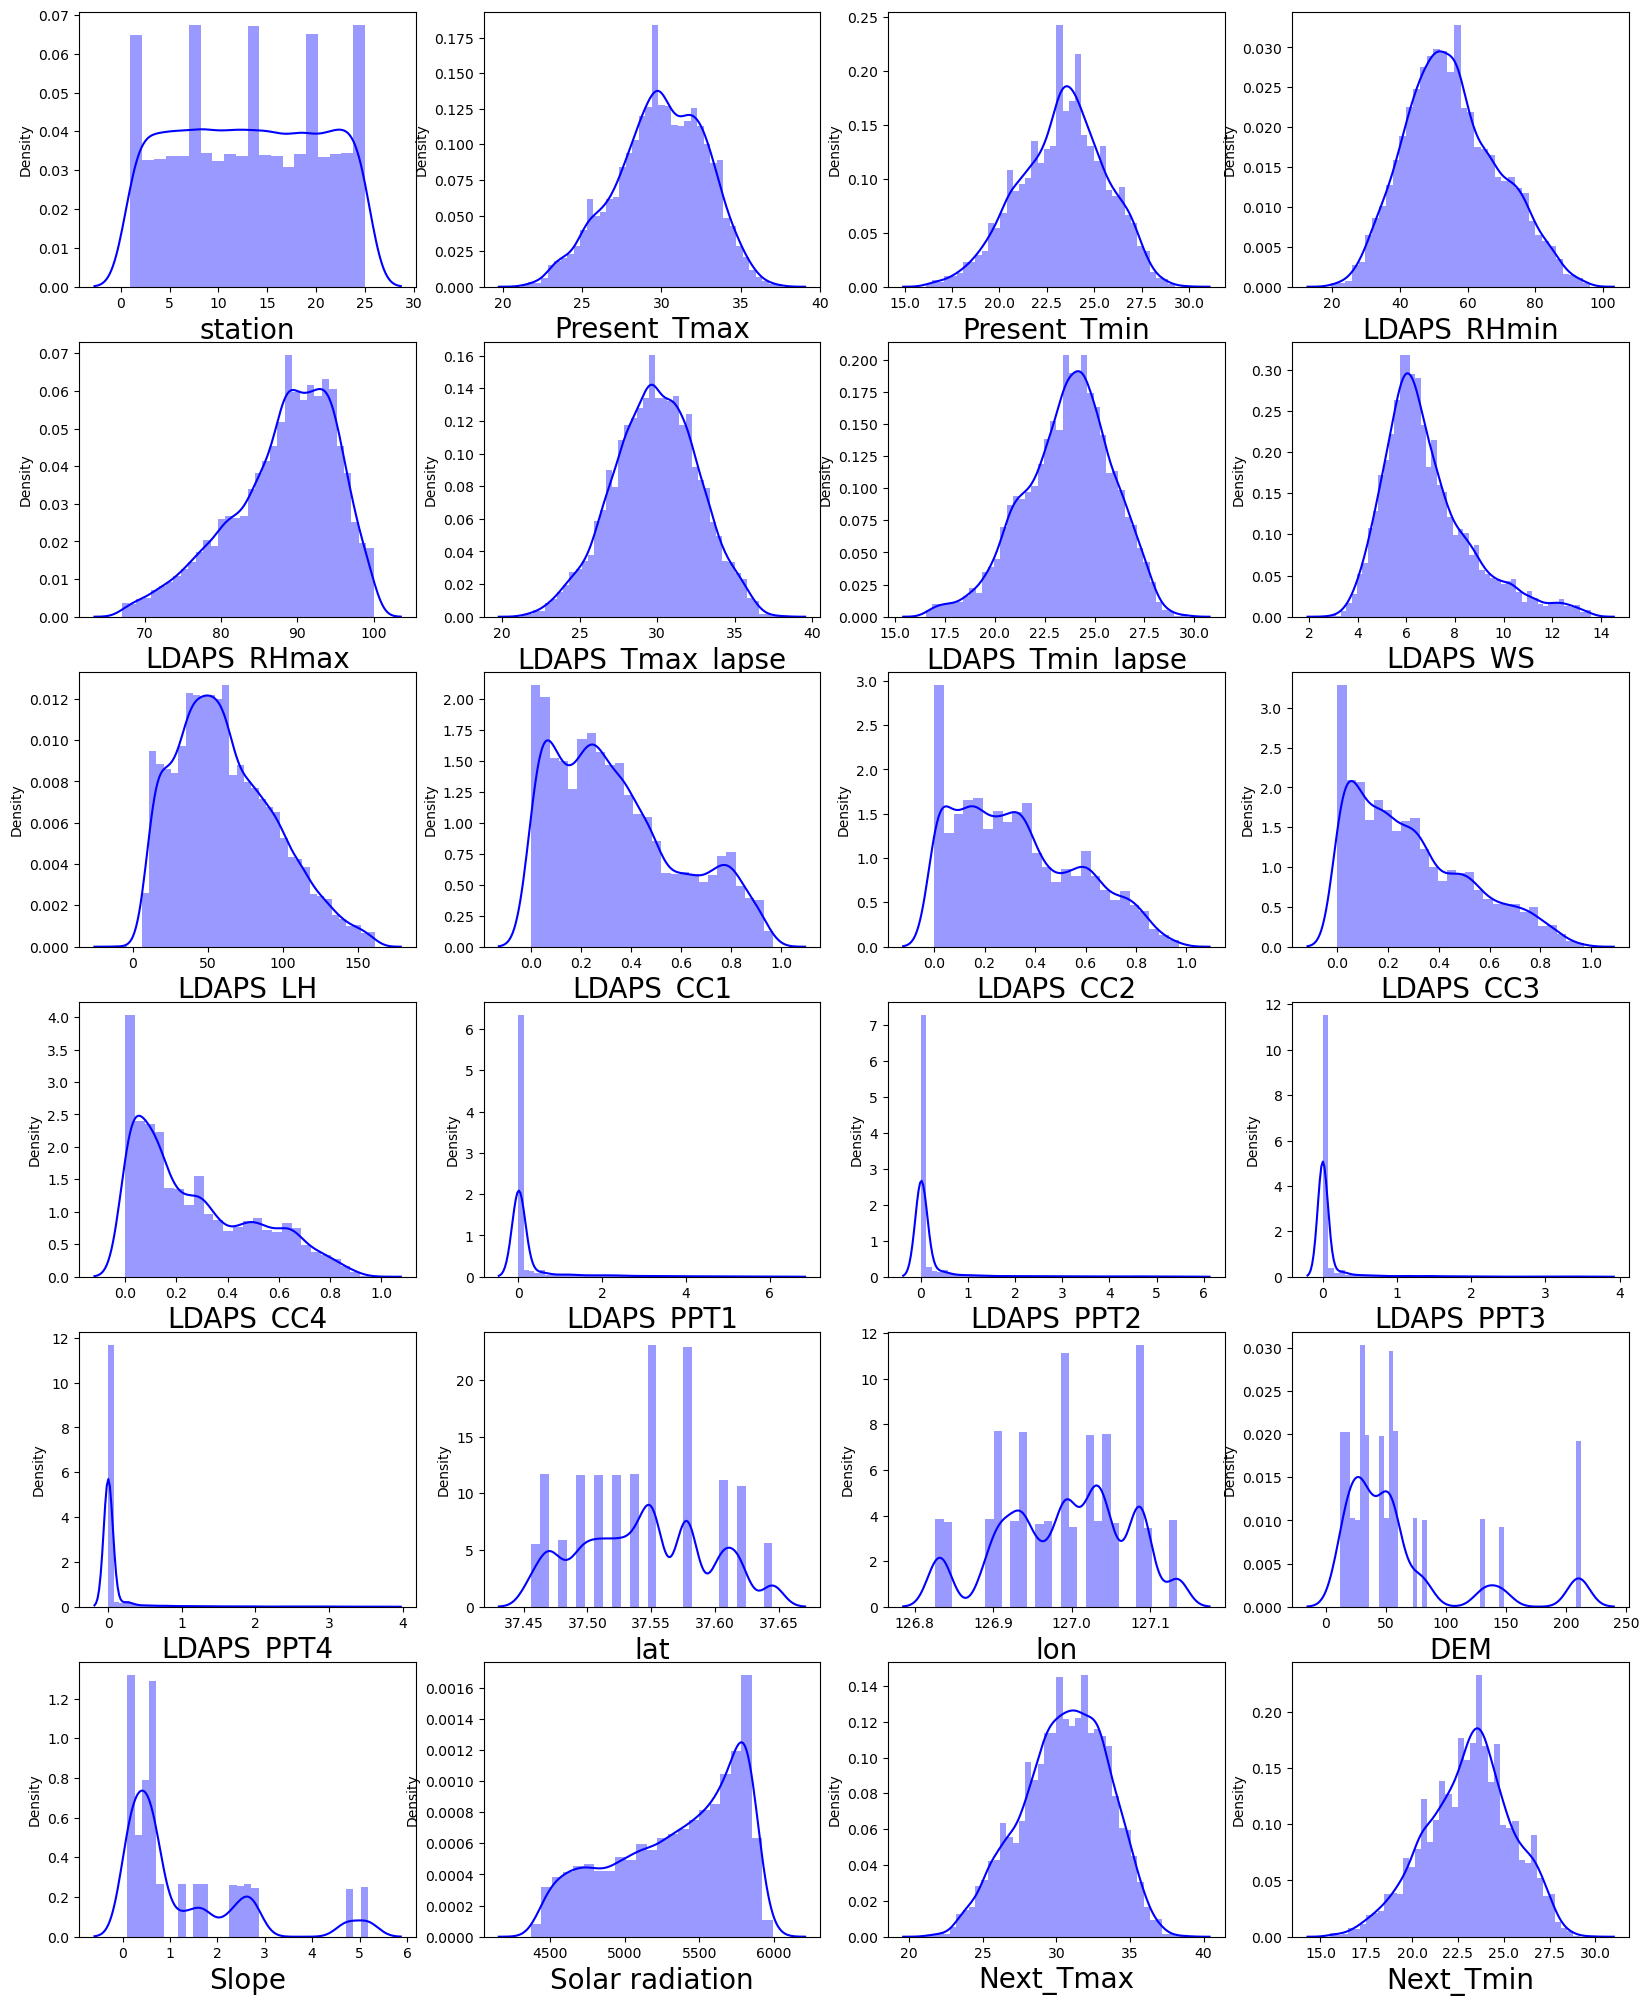

In [30]:
#Checking how data is distributed in each column
plt.figure(figsize=(20, 25), facecolor='white')
plotnumber=1

for column in df:
    if plotnumber<=24:
        ax = plt.subplot(6,4, plotnumber)
        sns.distplot(df[column], color='b')
        plt.xlabel(column, fontsize=20)
    plotnumber+=1
plt.show()    

We can notice the data looks more normal than before.

### Checking for skewness

In [31]:
df.skew()

station             0.002792
Present_Tmax       -0.272653
Present_Tmin       -0.225479
LDAPS_RHmin         0.305740
LDAPS_RHmax        -0.688257
LDAPS_Tmax_lapse   -0.109372
LDAPS_Tmin_lapse   -0.382667
LDAPS_WS            1.087781
LDAPS_LH            0.568781
LDAPS_CC1           0.593990
LDAPS_CC2           0.500911
LDAPS_CC3           0.700217
LDAPS_CC4           0.710930
LDAPS_PPT1          3.731226
LDAPS_PPT2          4.843672
LDAPS_PPT3          5.482625
LDAPS_PPT4          5.927822
lat                 0.108251
lon                -0.275508
DEM                 1.764031
Slope               1.593600
Solar radiation    -0.505353
Next_Tmax          -0.270084
Next_Tmin          -0.237767
dtype: float64

We can see there are some skewness present in LDAPS_WS, LDAPS_CC3, LDAPS_CC4, LDAPS_PPT1, LDAPS_PPT2, LDAPS_PPT3, LDAPS_PPT4, DEM, Slope.

In [32]:
#Let's reduce the skewness using transformation methods

df['LDAPS_WS'] = np.cbrt(df['LDAPS_WS'])

df['LDAPS_CC3'] = np.sqrt(df['LDAPS_CC3'])

df['LDAPS_CC4'] = np.sqrt(df['LDAPS_CC4'])

df['LDAPS_PPT1'] = np.cbrt(df['LDAPS_PPT1'])

df['LDAPS_PPT2'] = np.cbrt(df['LDAPS_PPT2'])

df['LDAPS_PPT3'] = np.cbrt(df['LDAPS_PPT3'])

df['LDAPS_PPT4'] = np.cbrt(df['LDAPS_PPT4'])

df['DEM'] = np.cbrt(df['DEM'])

df['Slope'] = np.cbrt(df['Slope'])

In [33]:
#Let's check
df.skew()

station             0.002792
Present_Tmax       -0.272653
Present_Tmin       -0.225479
LDAPS_RHmin         0.305740
LDAPS_RHmax        -0.688257
LDAPS_Tmax_lapse   -0.109372
LDAPS_Tmin_lapse   -0.382667
LDAPS_WS            0.616390
LDAPS_LH            0.568781
LDAPS_CC1           0.593990
LDAPS_CC2           0.500911
LDAPS_CC3          -0.102408
LDAPS_CC4           0.002974
LDAPS_PPT1          1.854774
LDAPS_PPT2          2.242623
LDAPS_PPT3          2.392493
LDAPS_PPT4          2.714029
lat                 0.108251
lon                -0.275508
DEM                 0.934952
Slope               0.621552
Solar radiation    -0.505353
Next_Tmax          -0.270084
Next_Tmin          -0.237767
dtype: float64

There are still some skewness left, let's deal with them.

In [34]:
df['LDAPS_WS'] = np.sqrt(df['LDAPS_WS'])

df['LDAPS_PPT1'] = np.cbrt(df['LDAPS_PPT1'])
                              
df['LDAPS_PPT2'] = np.cbrt(df['LDAPS_PPT2'])
                              
df['LDAPS_PPT3'] = np.cbrt(df['LDAPS_PPT3'])
                              
df['LDAPS_PPT4'] = np.cbrt(df['LDAPS_PPT4'])                              
                              
df['DEM'] = np.sqrt(df['DEM'])
                              
df['Slope'] = np.sqrt(df['Slope'])                             

In [35]:
#Let's check again
df.skew()

station             0.002792
Present_Tmax       -0.272653
Present_Tmin       -0.225479
LDAPS_RHmin         0.305740
LDAPS_RHmax        -0.688257
LDAPS_Tmax_lapse   -0.109372
LDAPS_Tmin_lapse   -0.382667
LDAPS_WS            0.497914
LDAPS_LH            0.568781
LDAPS_CC1           0.593990
LDAPS_CC2           0.500911
LDAPS_CC3          -0.102408
LDAPS_CC4           0.002974
LDAPS_PPT1          0.932375
LDAPS_PPT2          1.151439
LDAPS_PPT3          1.249232
LDAPS_PPT4          1.597450
lat                 0.108251
lon                -0.275508
DEM                 0.680620
Slope               0.348571
Solar radiation    -0.505353
Next_Tmax          -0.270084
Next_Tmin          -0.237767
dtype: float64

In [36]:
df['LDAPS_PPT1'] = np.cbrt(df['LDAPS_PPT1'])

df['LDAPS_PPT2'] = np.cbrt(df['LDAPS_PPT2'])

df['LDAPS_PPT3'] = np.cbrt(df['LDAPS_PPT3'])

df['LDAPS_PPT4'] = np.cbrt(df['LDAPS_PPT4'])

In [37]:
df.skew()

station             0.002792
Present_Tmax       -0.272653
Present_Tmin       -0.225479
LDAPS_RHmin         0.305740
LDAPS_RHmax        -0.688257
LDAPS_Tmax_lapse   -0.109372
LDAPS_Tmin_lapse   -0.382667
LDAPS_WS            0.497914
LDAPS_LH            0.568781
LDAPS_CC1           0.593990
LDAPS_CC2           0.500911
LDAPS_CC3          -0.102408
LDAPS_CC4           0.002974
LDAPS_PPT1          0.682383
LDAPS_PPT2          0.908041
LDAPS_PPT3          1.020420
LDAPS_PPT4          1.376963
lat                 0.108251
lon                -0.275508
DEM                 0.680620
Slope               0.348571
Solar radiation    -0.505353
Next_Tmax          -0.270084
Next_Tmin          -0.237767
dtype: float64

In [38]:
#Reducing again
df['LDAPS_PPT1'] = np.sqrt(df['LDAPS_PPT1'])

df['LDAPS_PPT2'] = np.sqrt(df['LDAPS_PPT2'])

df['LDAPS_PPT3'] = np.cbrt(df['LDAPS_PPT3'])

df['LDAPS_PPT4'] = np.cbrt(df['LDAPS_PPT4'])

df['DEM'] = np.sqrt(df['DEM'])

In [39]:
df.skew()

station             0.002792
Present_Tmax       -0.272653
Present_Tmin       -0.225479
LDAPS_RHmin         0.305740
LDAPS_RHmax        -0.688257
LDAPS_Tmax_lapse   -0.109372
LDAPS_Tmin_lapse   -0.382667
LDAPS_WS            0.497914
LDAPS_LH            0.568781
LDAPS_CC1           0.593990
LDAPS_CC2           0.500911
LDAPS_CC3          -0.102408
LDAPS_CC4           0.002974
LDAPS_PPT1          0.651970
LDAPS_PPT2          0.879566
LDAPS_PPT3          0.990055
LDAPS_PPT4          1.347572
lat                 0.108251
lon                -0.275508
DEM                 0.549371
Slope               0.348571
Solar radiation    -0.505353
Next_Tmax          -0.270084
Next_Tmin          -0.237767
dtype: float64

It looks good now. Let's move ahead.

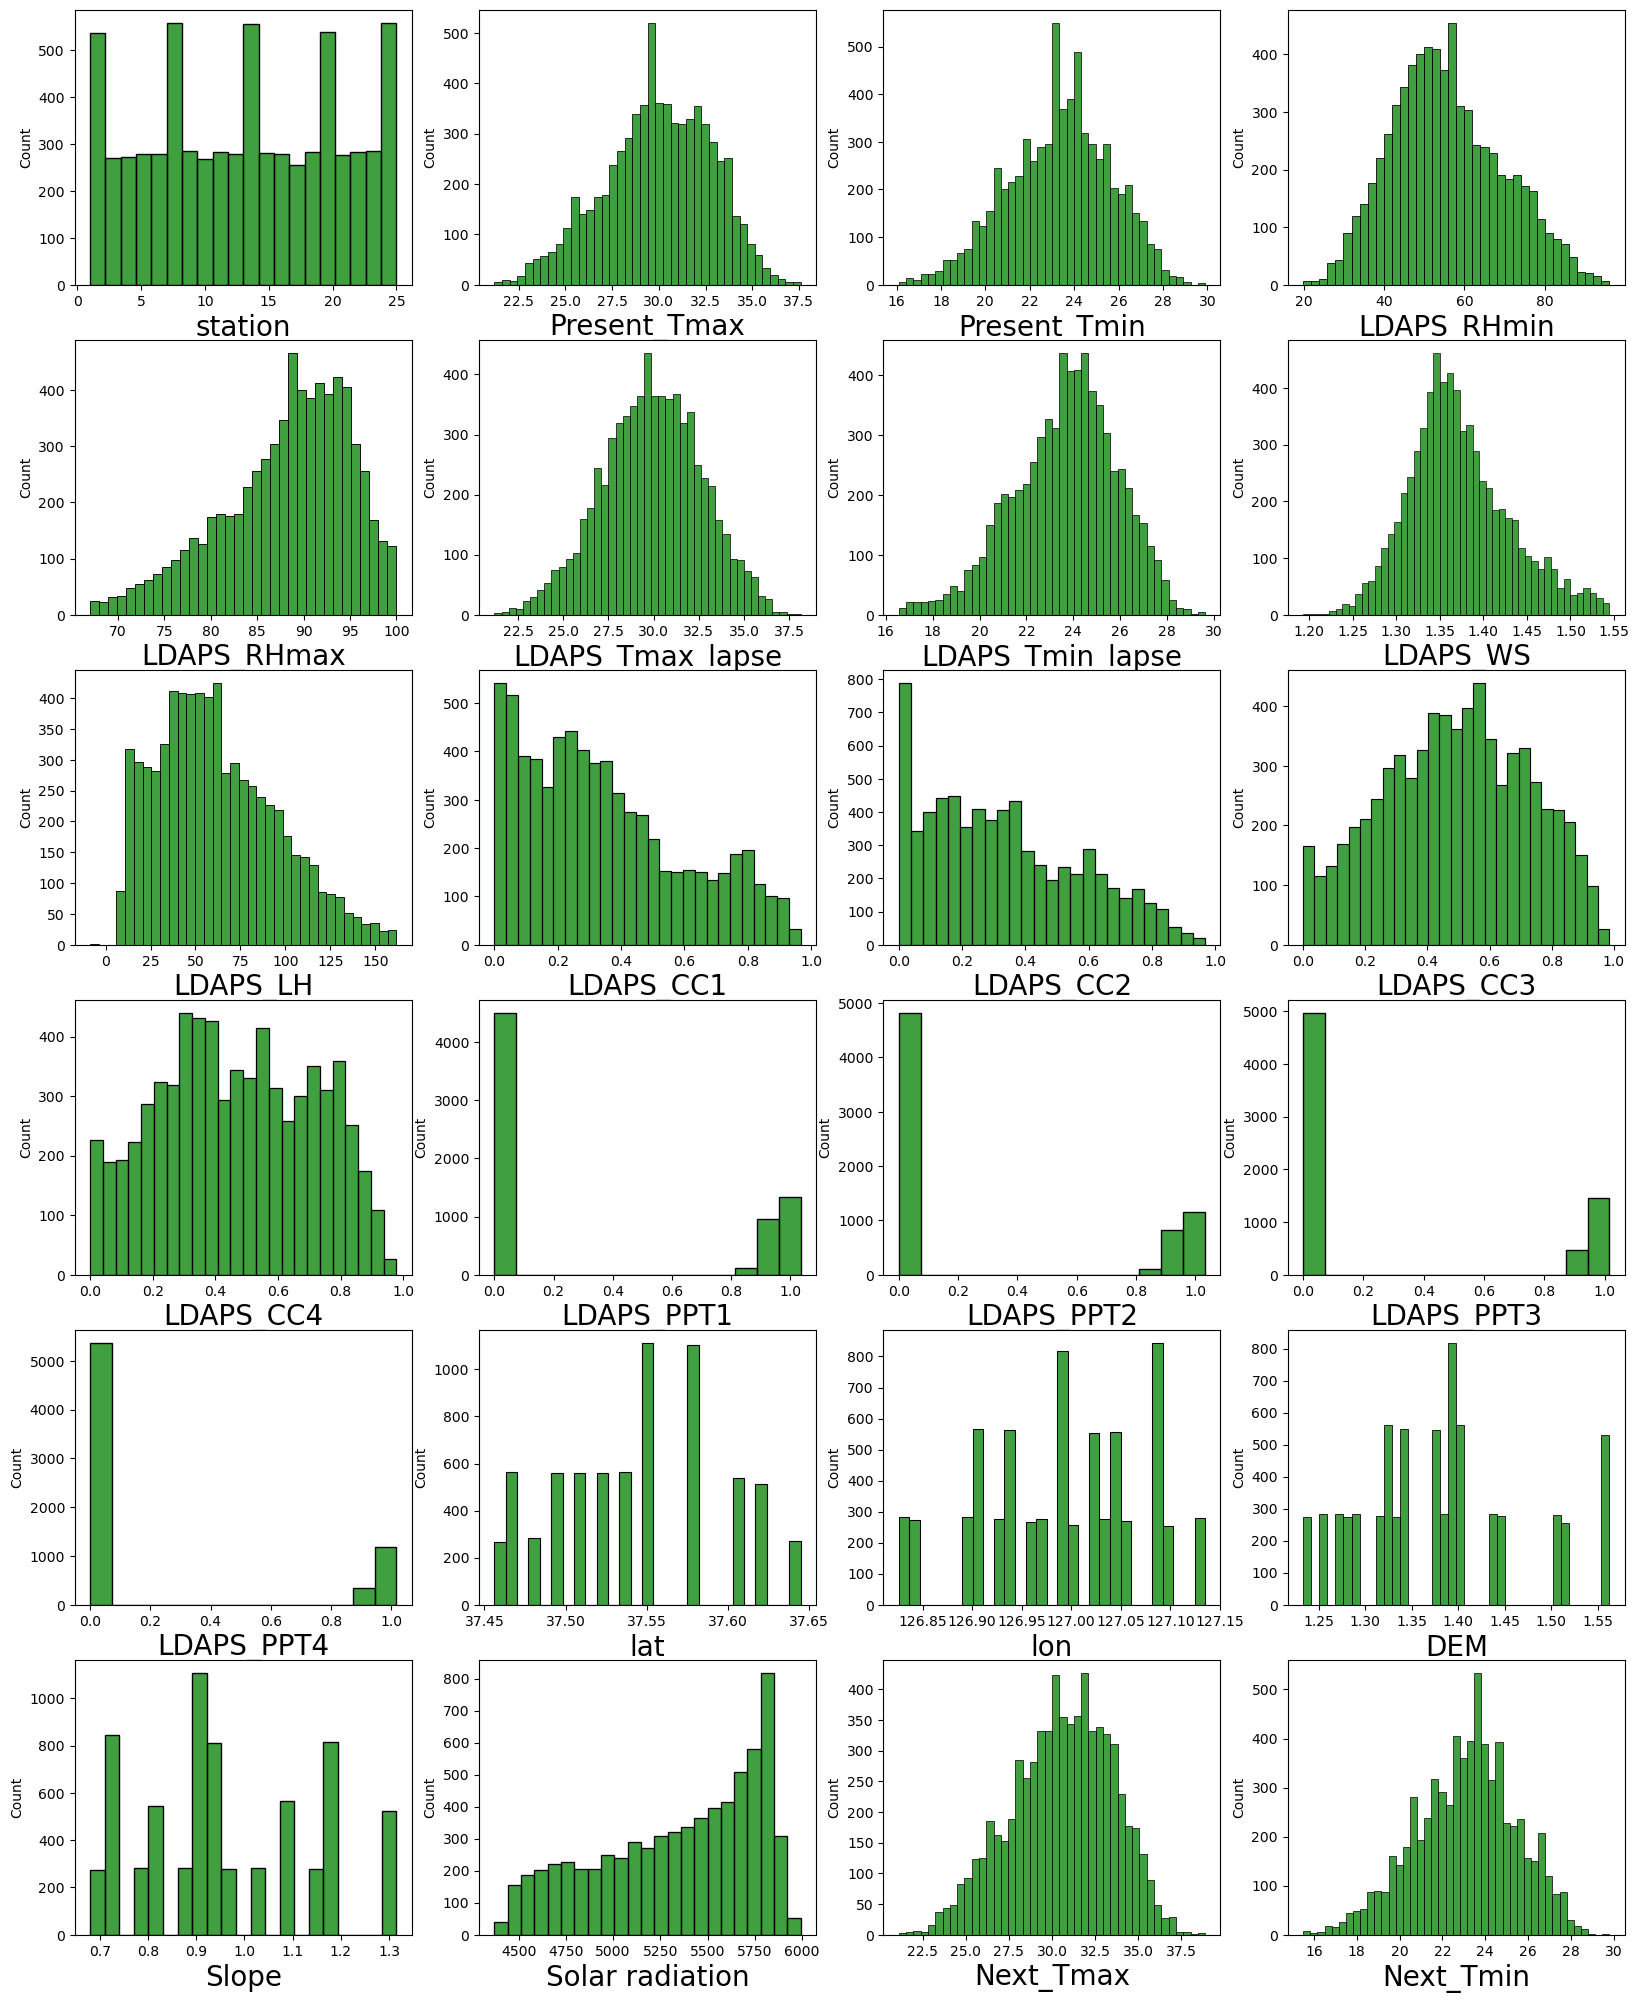

In [40]:
#Let's visualize again
plt.figure(figsize=(20, 25), facecolor='white')
plotnumber=1

for column in df:
    if plotnumber<=24:
        ax = plt.subplot(6,4, plotnumber)
        sns.histplot(df[column], color='green')
        plt.xlabel(column, fontsize=20)
    plotnumber+=1
plt.show()    

Our data looks mostly normal. Let's move ahead.

In [41]:
#Checking for nulls
df.isna().sum()

station             0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

### Separating features and label

In [42]:
x = df.drop("Next_Tmin", axis=1)
y = df["Next_Tmin"]

In [43]:
print(x.shape)
print(y.shape)

(6894, 23)
(6894,)


In [44]:
x

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
Date                                                                        
2013-06-30      1.0          28.7          21.4    58.255688    91.116364   
2013-06-30      2.0          31.9          21.6    52.263397    90.604721   
2013-06-30      3.0          31.6          23.3    48.690479    83.973587   
2013-06-30      4.0          32.0          23.4    58.239788    96.483688   
2013-06-30      5.0          31.4          21.9    56.174095    90.155128   
...             ...           ...           ...          ...          ...   
2017-08-30     21.0          23.1          17.8    24.688997    78.261383   
2017-08-30     22.0          22.5          17.4    30.094858    83.690018   
2017-08-30     23.0          23.3          17.1    26.741310    78.869858   
2017-08-30     24.0          23.3          17.7    24.040634    77.294975   
2017-08-30     25.0          23.2          17.4    22.933014    77.243744   

            LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  \
Date                                                                   
2013-06-30         28.074101         23.006936  1.377058   69.451805   
2013-06-30         29.850689         24.035009  1.336214   51.937448   
2013-06-30         30.091292         24.565633  1.353133   20.573050   
2013-06-30         29.704629         23.326177  1.334572   65.727144   
2013-06-30         29.113934         23.486480  1.337896  107.965535   
...                      ...               ...       ...         ...   
2017-08-30         27.812697         18.303014  1.369703    9.614074   
2017-08-30         26.704905         17.814038  1.339179   82.146707   
2017-08-30         26.352081         18.775678  1.353526   72.058294   
2017-08-30         27.010193         18.733519  1.367605   47.241457   
2017-08-30         27.939516         18.522965  1.392453    9.090034   

            LDAPS_CC1  ...  LDAPS_PPT1  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4  \
Date                   ...                                                   
2013-06-30   0.233947  ...         0.0         0.0         0.0         0.0   
2013-06-30   0.225508  ...         0.0         0.0         0.0         0.0   
2013-06-30   0.209344  ...         0.0         0.0         0.0         0.0   
2013-06-30   0.216372  ...         0.0         0.0         0.0         0.0   
2013-06-30   0.151407  ...         0.0         0.0         0.0         0.0   
...               ...  ...         ...         ...         ...         ...   
2017-08-30   0.052902  ...         0.0         0.0         0.0         0.0   
2017-08-30   0.066461  ...         0.0         0.0         0.0         0.0   
2017-08-30   0.030034  ...         0.0         0.0         0.0         0.0   
2017-08-30   0.035874  ...         0.0         0.0         0.0         0.0   
2017-08-30   0.048954  ...         0.0         0.0         0.0         0.0   

                lat      lon       DEM     Slope  Solar radiation  Next_Tmax  
Date                                                                          
2013-06-30  37.6046  126.991  1.562854  1.186144      5992.895996       29.1  
2013-06-30  37.6046  127.032  1.372702  0.895038      5869.312500       30.5  
2013-06-30  37.5776  127.058  1.339300  0.802000      5863.555664       31.1  
2013-06-30  37.6450  127.022  1.375115  1.167680      5856.964844       31.7  
2013-06-30  37.5507  127.135  1.344967  0.892525      5859.552246       31.2  
...             ...      ...       ...       ...              ...        ...  
2017-08-30  37.5507  127.040  1.313188  0.911126      4456.024414       27.6  
2017-08-30  37.5102  127.086  1.293641  0.714635      4441.803711       28.0  
2017-08-30  37.5372  126.891  1.257182  0.733233      4443.313965       28.3  
2017-08-30  37.5237  126.909  1.268123  0.778317      4438.373535       28.6  
2017-08-30  37.5237  126.970  1.281325  0.804591      4451.345215       27.8  

[6894 rows x 23 columns]

Since LDAPS_PPT4 contains only inf values, it will create some problem during modelling and all. So let's just drop it.

In [45]:
x.drop('LDAPS_PPT4', axis=1, inplace=True)
x.head()

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
Date                                                                        
2013-06-30      1.0          28.7          21.4    58.255688    91.116364   
2013-06-30      2.0          31.9          21.6    52.263397    90.604721   
2013-06-30      3.0          31.6          23.3    48.690479    83.973587   
2013-06-30      4.0          32.0          23.4    58.239788    96.483688   
2013-06-30      5.0          31.4          21.9    56.174095    90.155128   

            LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  \
Date                                                                   
2013-06-30         28.074101         23.006936  1.377058   69.451805   
2013-06-30         29.850689         24.035009  1.336214   51.937448   
2013-06-30         30.091292         24.565633  1.353133   20.573050   
2013-06-30         29.704629         23.326177  1.334572   65.727144   
2013-06-30         29.113934         23.486480  1.337896  107.965535   

            LDAPS_CC1  ...  LDAPS_CC4  LDAPS_PPT1  LDAPS_PPT2  LDAPS_PPT3  \
Date                   ...                                                  
2013-06-30   0.233947  ...   0.361840         0.0         0.0         0.0   
2013-06-30   0.225508  ...   0.357390         0.0         0.0         0.0   
2013-06-30   0.209344  ...   0.376995         0.0         0.0         0.0   
2013-06-30   0.216372  ...   0.366400         0.0         0.0         0.0   
2013-06-30   0.151407  ...   0.412336         0.0         0.0         0.0   

                lat      lon       DEM     Slope  Solar radiation  Next_Tmax  
Date                                                                          
2013-06-30  37.6046  126.991  1.562854  1.186144      5992.895996       29.1  
2013-06-30  37.6046  127.032  1.372702  0.895038      5869.312500       30.5  
2013-06-30  37.5776  127.058  1.339300  0.802000      5863.555664       31.1  
2013-06-30  37.6450  127.022  1.375115  1.167680      5856.964844       31.7  
2013-06-30  37.5507  127.135  1.344967  0.892525      5859.552246       31.2  

[5 rows x 22 columns]

It looks good now. Let's proceed ahead.

### Feature Scaling using Standard Scaler

In [46]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [47]:
x_scaled = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x_scaled

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0    -1.671954     -0.433615     -0.828471     0.191277     0.436386   
1    -1.533039      0.687567     -0.741763    -0.242211     0.362340   
2    -1.394124      0.582457     -0.004748    -0.500679    -0.597331   
3    -1.255209      0.722604      0.038606     0.190127     1.213156   
4    -1.116295      0.512383     -0.611702     0.040693     0.297274   
...        ...           ...           ...          ...          ...   
6889  1.106341     -2.395683     -2.389208    -2.236969    -1.424012   
6890  1.245255     -2.605905     -2.562623    -1.845904    -0.638370   
6891  1.384170     -2.325609     -2.692685    -2.088503    -1.335953   
6892  1.523085     -2.325609     -2.432562    -2.283872    -1.563873   
6893  1.661999     -2.360646     -2.562623    -2.363999    -1.571287   

      LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS  LDAPS_LH  LDAPS_CC1  ...  \
0            -0.661684         -0.290765  0.081888  0.225159  -0.445412  ...   
1            -0.012103          0.173349 -0.620774 -0.301816  -0.479100  ...   
2             0.075869          0.412895 -0.329711 -1.245514  -0.543626  ...   
3            -0.065508         -0.146647 -0.649023  0.113090  -0.515570  ...   
4            -0.281486         -0.074279 -0.591844  1.383966  -0.774897  ...   
...                ...               ...       ...       ...        ...  ...   
6889         -0.757262         -2.414309 -0.044650 -1.575249  -1.168108  ...   
6890         -1.162309         -2.635053 -0.569771  0.607125  -1.113984  ...   
6891         -1.291313         -2.200929 -0.322957  0.303583  -1.259392  ...   
6892         -1.050685         -2.219962 -0.080731 -0.443110  -1.236082  ...   
6893         -0.710893         -2.315014  0.346740 -1.591016  -1.183870  ...   

      LDAPS_CC4  LDAPS_PPT1  LDAPS_PPT2  LDAPS_PPT3       lat       lon  \
0     -0.428796   -0.728336   -0.654708   -0.621592  1.214518  0.002256   
1     -0.447091   -0.728336   -0.654708   -0.621592  1.214518  0.516874   
2     -0.366495   -0.728336   -0.654708   -0.621592  0.674104  0.843217   
3     -0.410051   -0.728336   -0.654708   -0.621592  2.023139  0.391357   
4     -0.221211   -0.728336   -0.654708   -0.621592  0.135691  1.809694   
...         ...         ...         ...         ...       ...       ...   
6889  -1.644221   -0.728336   -0.654708   -0.621592  0.135691  0.617287   
6890  -1.369708   -0.728336   -0.654708   -0.621592 -0.674931  1.194663   
6891  -1.916285   -0.728336   -0.654708   -0.621592 -0.134517 -1.252910   
6892  -1.916285   -0.728336   -0.654708   -0.621592 -0.404724 -1.026980   
6893  -1.800291   -0.728336   -0.654708   -0.621592 -0.404724 -0.261329   

           DEM     Slope  Solar radiation  Next_Tmax  
0     2.149586  1.281714         1.552067  -0.499085  
1    -0.049151 -0.347735         1.257875  -0.021707  
2    -0.435377 -0.868508         1.244171   0.182884  
3    -0.021244  1.178363         1.228481   0.387474  
4    -0.369846 -0.361801         1.234641   0.216982  
...        ...       ...              ...        ...  
6889 -0.737306 -0.257678        -2.106479  -1.010562  
6890 -0.963323 -1.357527        -2.140332  -0.874168  
6891 -1.384900 -1.253425        -2.136737  -0.771873  
6892 -1.258395 -1.001069        -2.148498  -0.669577  
6893 -1.105742 -0.854005        -2.117618  -0.942365  

[6894 rows x 22 columns]

We have scaled the data to reduce biasness.

### Checking for VIF

In [48]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x_scaled, i) for i in range(x_scaled.shape[1])]
vif["Features"] = x.columns
vif

VIF values          Features
0     1.273500           station
1     2.729096      Present_Tmax
2     2.984596      Present_Tmin
3     5.845510       LDAPS_RHmin
4     2.274440       LDAPS_RHmax
5     7.804813  LDAPS_Tmax_lapse
6     6.454553  LDAPS_Tmin_lapse
7     1.200427          LDAPS_WS
8     1.543275          LDAPS_LH
9     4.774776         LDAPS_CC1
10    5.164650         LDAPS_CC2
11    4.269062         LDAPS_CC3
12    2.550313         LDAPS_CC4
13    2.576311        LDAPS_PPT1
14    2.278657        LDAPS_PPT2
15    1.492017        LDAPS_PPT3
16    1.249463               lat
17    1.196304               lon
18    3.196640               DEM
19    2.885279             Slope
20    1.236176   Solar radiation
21    3.864897         Next_Tmax

Everything is <10. No need to remove anything. We can move ahead.

Since the data contains numerical data and not categorical data, we will use regression algorithms for training our data.

### Data Modelling

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

In [50]:
#Finding the best random state
maxAccu = 0
maxRS = 0
for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.30, random_state=i)
    lr = LinearRegression()
    lr.fit(x_train, y_train)
    pred = lr.predict(x_test)
    acc = r2_score(y_test, pred)
    if acc > maxAccu:
        maxAcuu=acc
        maxRS=i
print("Maximum r2 score is ", maxAccu, "on Random_state ", maxRS)        

Maximum r2 score is  0 on Random_state  199


### Model Training

In [51]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.30,random_state=maxRS)

### Regression Algorihtms

In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso, Ridge
from sklearn.svm import SVR
from sklearn.ensemble import ExtraTreesRegressor

In [53]:
#Linear Regression
LR = LinearRegression()
LR.fit(x_train, y_train)
pred_LR = LR.predict(x_test)
pred_train = LR.predict(x_train)
print('R2 Score:', r2_score(y_test, pred_LR))
print('R2 Score on training data:', r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:', mean_absolute_error(y_test, pred_LR))
print('Mean Squared Error:', mean_squared_error(y_test, pred_LR))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, pred_LR)))

R2 Score: 0.8337251680968508
R2 Score on training data: 83.22843307205085
Mean Absolute Error: 0.7645528697879662
Mean Squared Error: 0.9510002843761243
Root Mean Squared Error: 0.9751924345359352


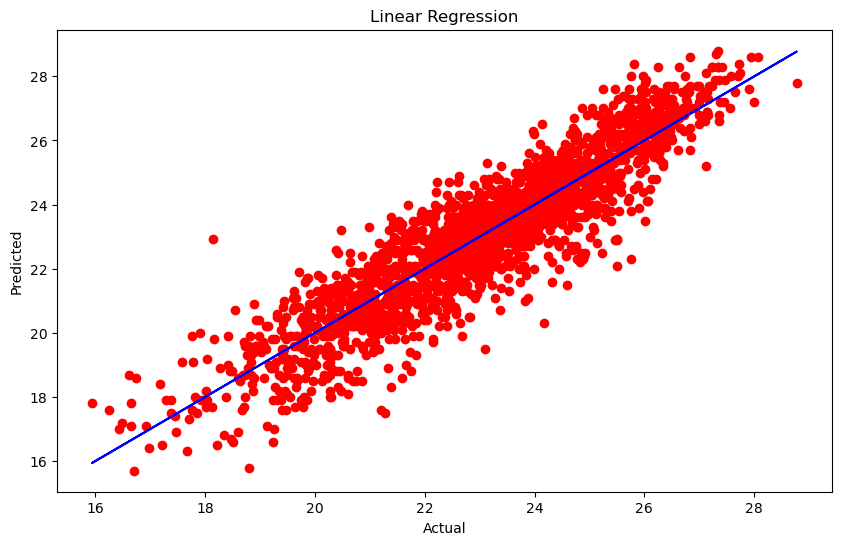

In [54]:
#Let's visualize it
plt.figure(figsize=(10,6))
plt.scatter(x= pred_LR, y= y_test, color='r')
plt.plot(pred_LR, pred_LR, color='b')
plt.xlabel("Actual", fontsize=10)
plt.ylabel("Predicted", fontsize=10)
plt.title("Linear Regression")
plt.show()

In [55]:
#Random Forest Regressor
RFR = RandomForestRegressor()
RFR.fit(x_train, y_train)
pred_RFR = RFR.predict(x_test)
pred_train = RFR.predict(x_train)
print('R2 Score:', r2_score(y_test, pred_RFR))
print('R2 Score on training data:', r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:', mean_absolute_error(y_test, pred_RFR))
print('Mean Squared Error:', mean_squared_error(y_test, pred_RFR))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, pred_RFR)))

R2 Score: 0.8966436151573585
R2 Score on training data: 98.53952327855879
Mean Absolute Error: 0.5859091357862483
Mean Squared Error: 0.5911414869731624
Root Mean Squared Error: 0.7688572604672225


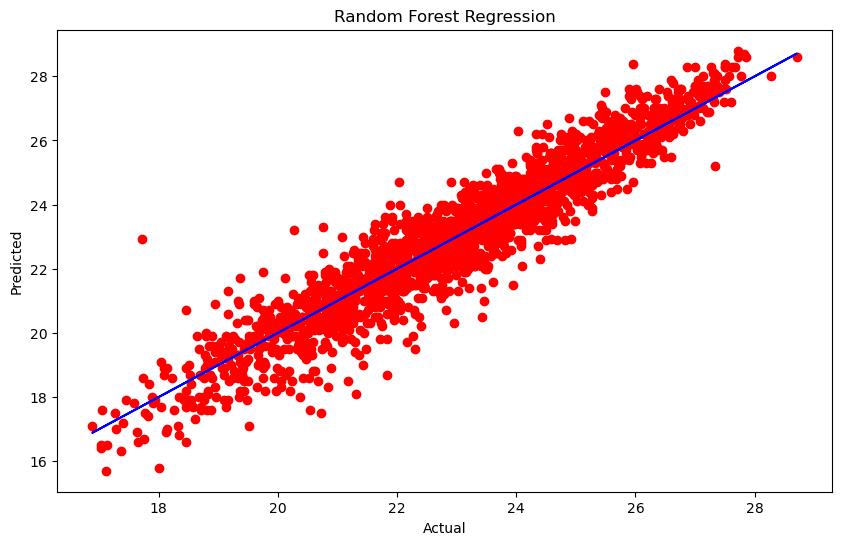

In [56]:
#Let's visualize it
plt.figure(figsize=(10,6))
plt.scatter(x= pred_RFR, y= y_test, color='r')
plt.plot(pred_RFR, pred_RFR, color='b')
plt.xlabel("Actual", fontsize=10)
plt.ylabel("Predicted", fontsize=10)
plt.title("Random Forest Regression")
plt.show()

In [57]:
#KNN
KNN = KNeighborsRegressor()
KNN.fit(x_train, y_train)
pred_KNN = KNN.predict(x_test)
pred_train = KNN.predict(x_train)
print('R2 Score:', r2_score(y_test, pred_KNN))
print('R2 Score on training data:', r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:', mean_absolute_error(y_test, pred_KNN))
print('Mean Squared Error:', mean_squared_error(y_test, pred_KNN))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, pred_KNN)))

R2 Score: 0.4777161581269168
R2 Score on training data: 68.79545371595192
Mean Absolute Error: 1.337544175773985
Mean Squared Error: 2.987175367801106
Root Mean Squared Error: 1.728344690101227


In [58]:
#Gradient Boosting Regressor
GBR = GradientBoostingRegressor()
GBR.fit(x_train, y_train)
pred_GBR = GBR.predict(x_test)
pred_train = GBR.predict(x_train)
print('R2 Score:', r2_score(y_test, pred_GBR))
print('R2 Score on training data:', r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:', mean_absolute_error(y_test, pred_GBR))
print('Mean Squared Error:', mean_squared_error(y_test, pred_GBR))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, pred_GBR)))

R2 Score: 0.8806218175052671
R2 Score on training data: 90.5429291050357
Mean Absolute Error: 0.6423057589242536
Mean Squared Error: 0.6827773283627392
Root Mean Squared Error: 0.8263034118063045


In [59]:
#Lasso Regression
lasso = Lasso()
lasso.fit(x_train, y_train)
pred_lasso = lasso.predict(x_test)
pred_train = lasso.predict(x_train)
print('R2 Score:', r2_score(y_test, pred_lasso))
print('R2 Score on training data:', r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:', mean_absolute_error(y_test, pred_lasso))
print('Mean Squared Error:', mean_squared_error(y_test, pred_lasso))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, pred_lasso)))

R2 Score: 0.772051021832061
R2 Score on training data: 77.26335394567514
Mean Absolute Error: 0.907588357537928
Mean Squared Error: 1.303742367860131
Root Mean Squared Error: 1.1418153825641564


In [60]:
#Ridge Regression
ridge = Ridge()
ridge.fit(x_train, y_train)
pred_ridge = ridge.predict(x_test)
pred_train = ridge.predict(x_train)
print('R2 Score:', r2_score(y_test, pred_ridge))
print('R2 Score on training data:', r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:', mean_absolute_error(y_test, pred_ridge))
print('Mean Squared Error:', mean_squared_error(y_test, pred_ridge))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, pred_ridge)))

R2 Score: 0.8337717037439516
R2 Score on training data: 83.22011553549747
Mean Absolute Error: 0.7645875857058654
Mean Squared Error: 0.9507341261541015
Root Mean Squared Error: 0.9750559605243698


In [61]:
#Decision Tree Regressor
DT = DecisionTreeRegressor()
DT.fit(x_train, y_train)
pred_DT = DT.predict(x_test)
pred_train = DT.predict(x_train)
print('R2 Score:', r2_score(y_test, pred_DT))
print('R2 Score on training data:', r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:', mean_absolute_error(y_test, pred_DT))
print('Mean Squared Error:', mean_squared_error(y_test, pred_DT))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, pred_DT)))

R2 Score: 0.7590368123940786
R2 Score on training data: 100.0
Mean Absolute Error: 0.874206002931235
Mean Squared Error: 1.378176464318341
Root Mean Squared Error: 1.1739576075473683


In [62]:
#SVR
svr = SVR()
svr.fit(x_train, y_train)
pred_svr = svr.predict(x_test)
pred_train = svr.predict(x_train)
print('R2 Score:', r2_score(y_test, pred_svr))
print('R2 Score on training data:', r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:', mean_absolute_error(y_test, pred_svr))
print('Mean Squared Error:', mean_squared_error(y_test, pred_svr))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, pred_svr)))

R2 Score: 0.07725940801244191
R2 Score on training data: 8.6153029198883
Mean Absolute Error: 1.8234536618857102
Mean Squared Error: 5.277566997612107
Root Mean Squared Error: 2.297295583422409


In [63]:
#Extra Trees Regressor
ext = ExtraTreesRegressor()
ext.fit(x_train, y_train)
pred_ext = ext.predict(x_test)
pred_train = ext.predict(x_train)
print('R2 Score:', r2_score(y_test, pred_ext))
print('R2 Score on training data:', r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:', mean_absolute_error(y_test, pred_ext))
print('Mean Squared Error:', mean_squared_error(y_test, pred_ext))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, pred_ext)))

R2 Score: 0.9072174327113279
R2 Score on training data: 100.0
Mean Absolute Error: 0.552185179088439
Mean Squared Error: 0.5306650854295816
Root Mean Squared Error: 0.7284676282646894


Among all these algorithms Extra Trees Regressor gives the best R2 score of 90%.

### Cross Validation

In [64]:
from sklearn.model_selection import cross_val_score

In [65]:
#Linear Regression
score = cross_val_score(LR, x, y)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is:", (r2_score(y_test, pred_LR) - score.mean())*100)

[0.75022162 0.68288703 0.79609174 0.84794264 0.85315887]
0.7860603805082721
Difference between R2 score and cross validation score is: 4.766478758857873


In [66]:
#Random Forest 
score = cross_val_score(RFR, x, y)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is:", (r2_score(y_test, pred_RFR) - score.mean())*100)

[0.73114945 0.69850095 0.80707069 0.84978394 0.84719793]
0.7867405929702305
Difference between R2 score and cross validation score is: 10.990302218712799


In [67]:
#Gradient Boosting
score = cross_val_score(GBR, x, y)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is:", (r2_score(y_test, pred_GBR) - score.mean())*100)

[0.73124673 0.69684669 0.82227068 0.85653884 0.86583014]
0.7945466135767432
Difference between R2 score and cross validation score is: 8.607520392852397


In [68]:
#KNN
score = cross_val_score(KNN, x, y)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is:", (r2_score(y_test, pred_KNN) - score.mean())*100)

[-0.04541532 -0.37102685  0.18765404  0.25517858  0.32141644]
0.06956137987162918
Difference between R2 score and cross validation score is: 40.81547782552876


In [69]:
#Lasso
score = cross_val_score(lasso, x, y)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is:", (r2_score(y_test, pred_lasso) - score.mean())*100)

[0.68590306 0.62724553 0.74803696 0.73997484 0.81686943]
0.7236059648027997
Difference between R2 score and cross validation score is: 4.844505702926128


In [70]:
#Ridge
score = cross_val_score(ridge, x, y)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is:", (r2_score(y_test, pred_ridge) - score.mean())*100)

[0.74920308 0.68368231 0.79610653 0.84833937 0.8538513 ]
0.7862365170044237
Difference between R2 score and cross validation score is: 4.753518673952795


In [71]:
#Decision Tree
score = cross_val_score(DT, x, y)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is:", (r2_score(y_test, pred_DT) - score.mean())*100)

[0.48868591 0.46296493 0.63933838 0.70741461 0.64460112]
0.5886009917364092
Difference between R2 score and cross validation score is: 17.043582065766937


In [72]:
#SVR
score = cross_val_score(svr, x, y)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is:", (r2_score(y_test, pred_svr) - score.mean())*100)

[-0.07879091 -0.51233336 -0.015603   -0.0802046   0.09268954]
-0.11884846726054539
Difference between R2 score and cross validation score is: 19.61078752729873


In [73]:
#Extra Trees
score = cross_val_score(ext, x, y)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is:", (r2_score(y_test, pred_ext) - score.mean())*100)

[0.73863869 0.69102145 0.81155106 0.85229565 0.86275856]
0.7912530843812956
Difference between R2 score and cross validation score is: 11.596434833003233


In this case, Ridge Regression has the least difference between R2 score and cross validation score. And we conclude that Ridge Regresion works best.

### Hyper parameter Tuning

In [74]:
from sklearn.model_selection import GridSearchCV

In [75]:
#Ridge
param = {'alpha': [1.0, 0.05, 0.4, 2], 'fit_intercept': [True, False],
        'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sag', 'saga', 'lbfgs'],
        'positive': [True, False],
        'random_state': [1, 4, 10, 20]}

grid = GridSearchCV(Ridge(), param, cv=5)
grid.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1.0, 0.05, 0.4, 2],
                         'fit_intercept': [True, False],
                         'positive': [True, False],
                         'random_state': [1, 4, 10, 20],
                         'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sag',
                                    'saga', 'lbfgs']})

In [76]:
grid.best_params_

{'alpha': 0.05,
 'fit_intercept': True,
 'positive': False,
 'random_state': 1,
 'solver': 'svd'}

In [77]:
model = Ridge(alpha=0.05, fit_intercept=True, positive=False, random_state=1, solver='svd')

In [78]:
model.fit(x_train, y_train)
pred = model.predict(x_test)
print('R2 score:', r2_score(y_test, pred))
print('Mean Absolute Error:', mean_absolute_error(y_test, pred))
print('Mean Squared Error:', mean_squared_error(y_test, pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, pred)))

R2 score: 0.8337319739451607
Mean Absolute Error: 0.7645387789816296
Mean Squared Error: 0.9509613586794083
Root Mean Squared Error: 0.9751724763750299


We got 83% R2 score.

### Saving the model

In [79]:
import pickle

In [80]:
filename = 'Next_Min_Temp.pkl'
pickle.dump(model, open(filename, 'wb'))
#Model saved

In [81]:
loaded_model = pickle.load(open ('Next_Min_Temp.pkl','rb'))
result = loaded_model.score(x_test, y_test)
print(result*100)

83.37319739451607


In [82]:
conclusion = pd.DataFrame([loaded_model.predict(x_test)[:], y_test[:]], index=["Predicted", "Original"])
conclusion

0        1          2         3          4         5     \
Predicted  23.387284  26.0114  21.637245  24.24217  22.823134  24.74405   
Original   22.500000  25.9000  21.400000  24.40000  20.500000  26.10000   

                6          7          8          9     ...       2059  \
Predicted  23.390086  18.711173  20.747364  22.024701  ...  23.056157   
Original   23.600000  19.700000  19.700000  22.000000  ...  23.800000   

                2060       2061       2062       2063       2064       2065  \
Predicted  27.345792  26.469955  21.693808  23.041424  24.529696  20.792704   
Original   28.300000  26.300000  22.900000  22.700000  22.900000  20.700000   

                2066       2067       2068  
Predicted  25.048369  23.644675  25.672248  
Original   27.000000  23.000000  26.200000  

[2 rows x 2069 columns]

Done!!!

### 2) For Next_Tmax:

In [83]:
df

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
Date                                                                        
2013-06-30      1.0          28.7          21.4    58.255688    91.116364   
2013-06-30      2.0          31.9          21.6    52.263397    90.604721   
2013-06-30      3.0          31.6          23.3    48.690479    83.973587   
2013-06-30      4.0          32.0          23.4    58.239788    96.483688   
2013-06-30      5.0          31.4          21.9    56.174095    90.155128   
...             ...           ...           ...          ...          ...   
2017-08-30     21.0          23.1          17.8    24.688997    78.261383   
2017-08-30     22.0          22.5          17.4    30.094858    83.690018   
2017-08-30     23.0          23.3          17.1    26.741310    78.869858   
2017-08-30     24.0          23.3          17.7    24.040634    77.294975   
2017-08-30     25.0          23.2          17.4    22.933014    77.243744   

            LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  \
Date                                                                   
2013-06-30         28.074101         23.006936  1.377058   69.451805   
2013-06-30         29.850689         24.035009  1.336214   51.937448   
2013-06-30         30.091292         24.565633  1.353133   20.573050   
2013-06-30         29.704629         23.326177  1.334572   65.727144   
2013-06-30         29.113934         23.486480  1.337896  107.965535   
...                      ...               ...       ...         ...   
2017-08-30         27.812697         18.303014  1.369703    9.614074   
2017-08-30         26.704905         17.814038  1.339179   82.146707   
2017-08-30         26.352081         18.775678  1.353526   72.058294   
2017-08-30         27.010193         18.733519  1.367605   47.241457   
2017-08-30         27.939516         18.522965  1.392453    9.090034   

            LDAPS_CC1  ...  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4      lat  \
Date                   ...                                                
2013-06-30   0.233947  ...         0.0         0.0         0.0  37.6046   
2013-06-30   0.225508  ...         0.0         0.0         0.0  37.6046   
2013-06-30   0.209344  ...         0.0         0.0         0.0  37.5776   
2013-06-30   0.216372  ...         0.0         0.0         0.0  37.6450   
2013-06-30   0.151407  ...         0.0         0.0         0.0  37.5507   
...               ...  ...         ...         ...         ...      ...   
2017-08-30   0.052902  ...         0.0         0.0         0.0  37.5507   
2017-08-30   0.066461  ...         0.0         0.0         0.0  37.5102   
2017-08-30   0.030034  ...         0.0         0.0         0.0  37.5372   
2017-08-30   0.035874  ...         0.0         0.0         0.0  37.5237   
2017-08-30   0.048954  ...         0.0         0.0         0.0  37.5237   

                lon       DEM     Slope  Solar radiation  Next_Tmax  Next_Tmin  
Date                                                                            
2013-06-30  126.991  1.562854  1.186144      5992.895996       29.1       21.2  
2013-06-30  127.032  1.372702  0.895038      5869.312500       30.5       22.5  
2013-06-30  127.058  1.339300  0.802000      5863.555664       31.1       23.9  
2013-06-30  127.022  1.375115  1.167680      5856.964844       31.7       24.3  
2013-06-30  127.135  1.344967  0.892525      5859.552246       31.2       22.5  
...             ...       ...       ...              ...        ...        ...  
2017-08-30  127.040  1.313188  0.911126      4456.024414       27.6       17.7  
2017-08-30  127.086  1.293641  0.714635      4441.803711       28.0       17.1  
2017-08-30  126.891  1.257182  0.733233      4443.313965       28.3       18.1  
2017-08-30  126.909  1.268123  0.778317      4438.373535       28.6       18.8  
2017-08-30  126.970  1.281325  0.804591      4451.345215       27.8       17.4  

[6894 rows x 24 columns]

In [84]:
df.drop('LDAPS_PPT4', axis=1, inplace=True)

### Data Visualization

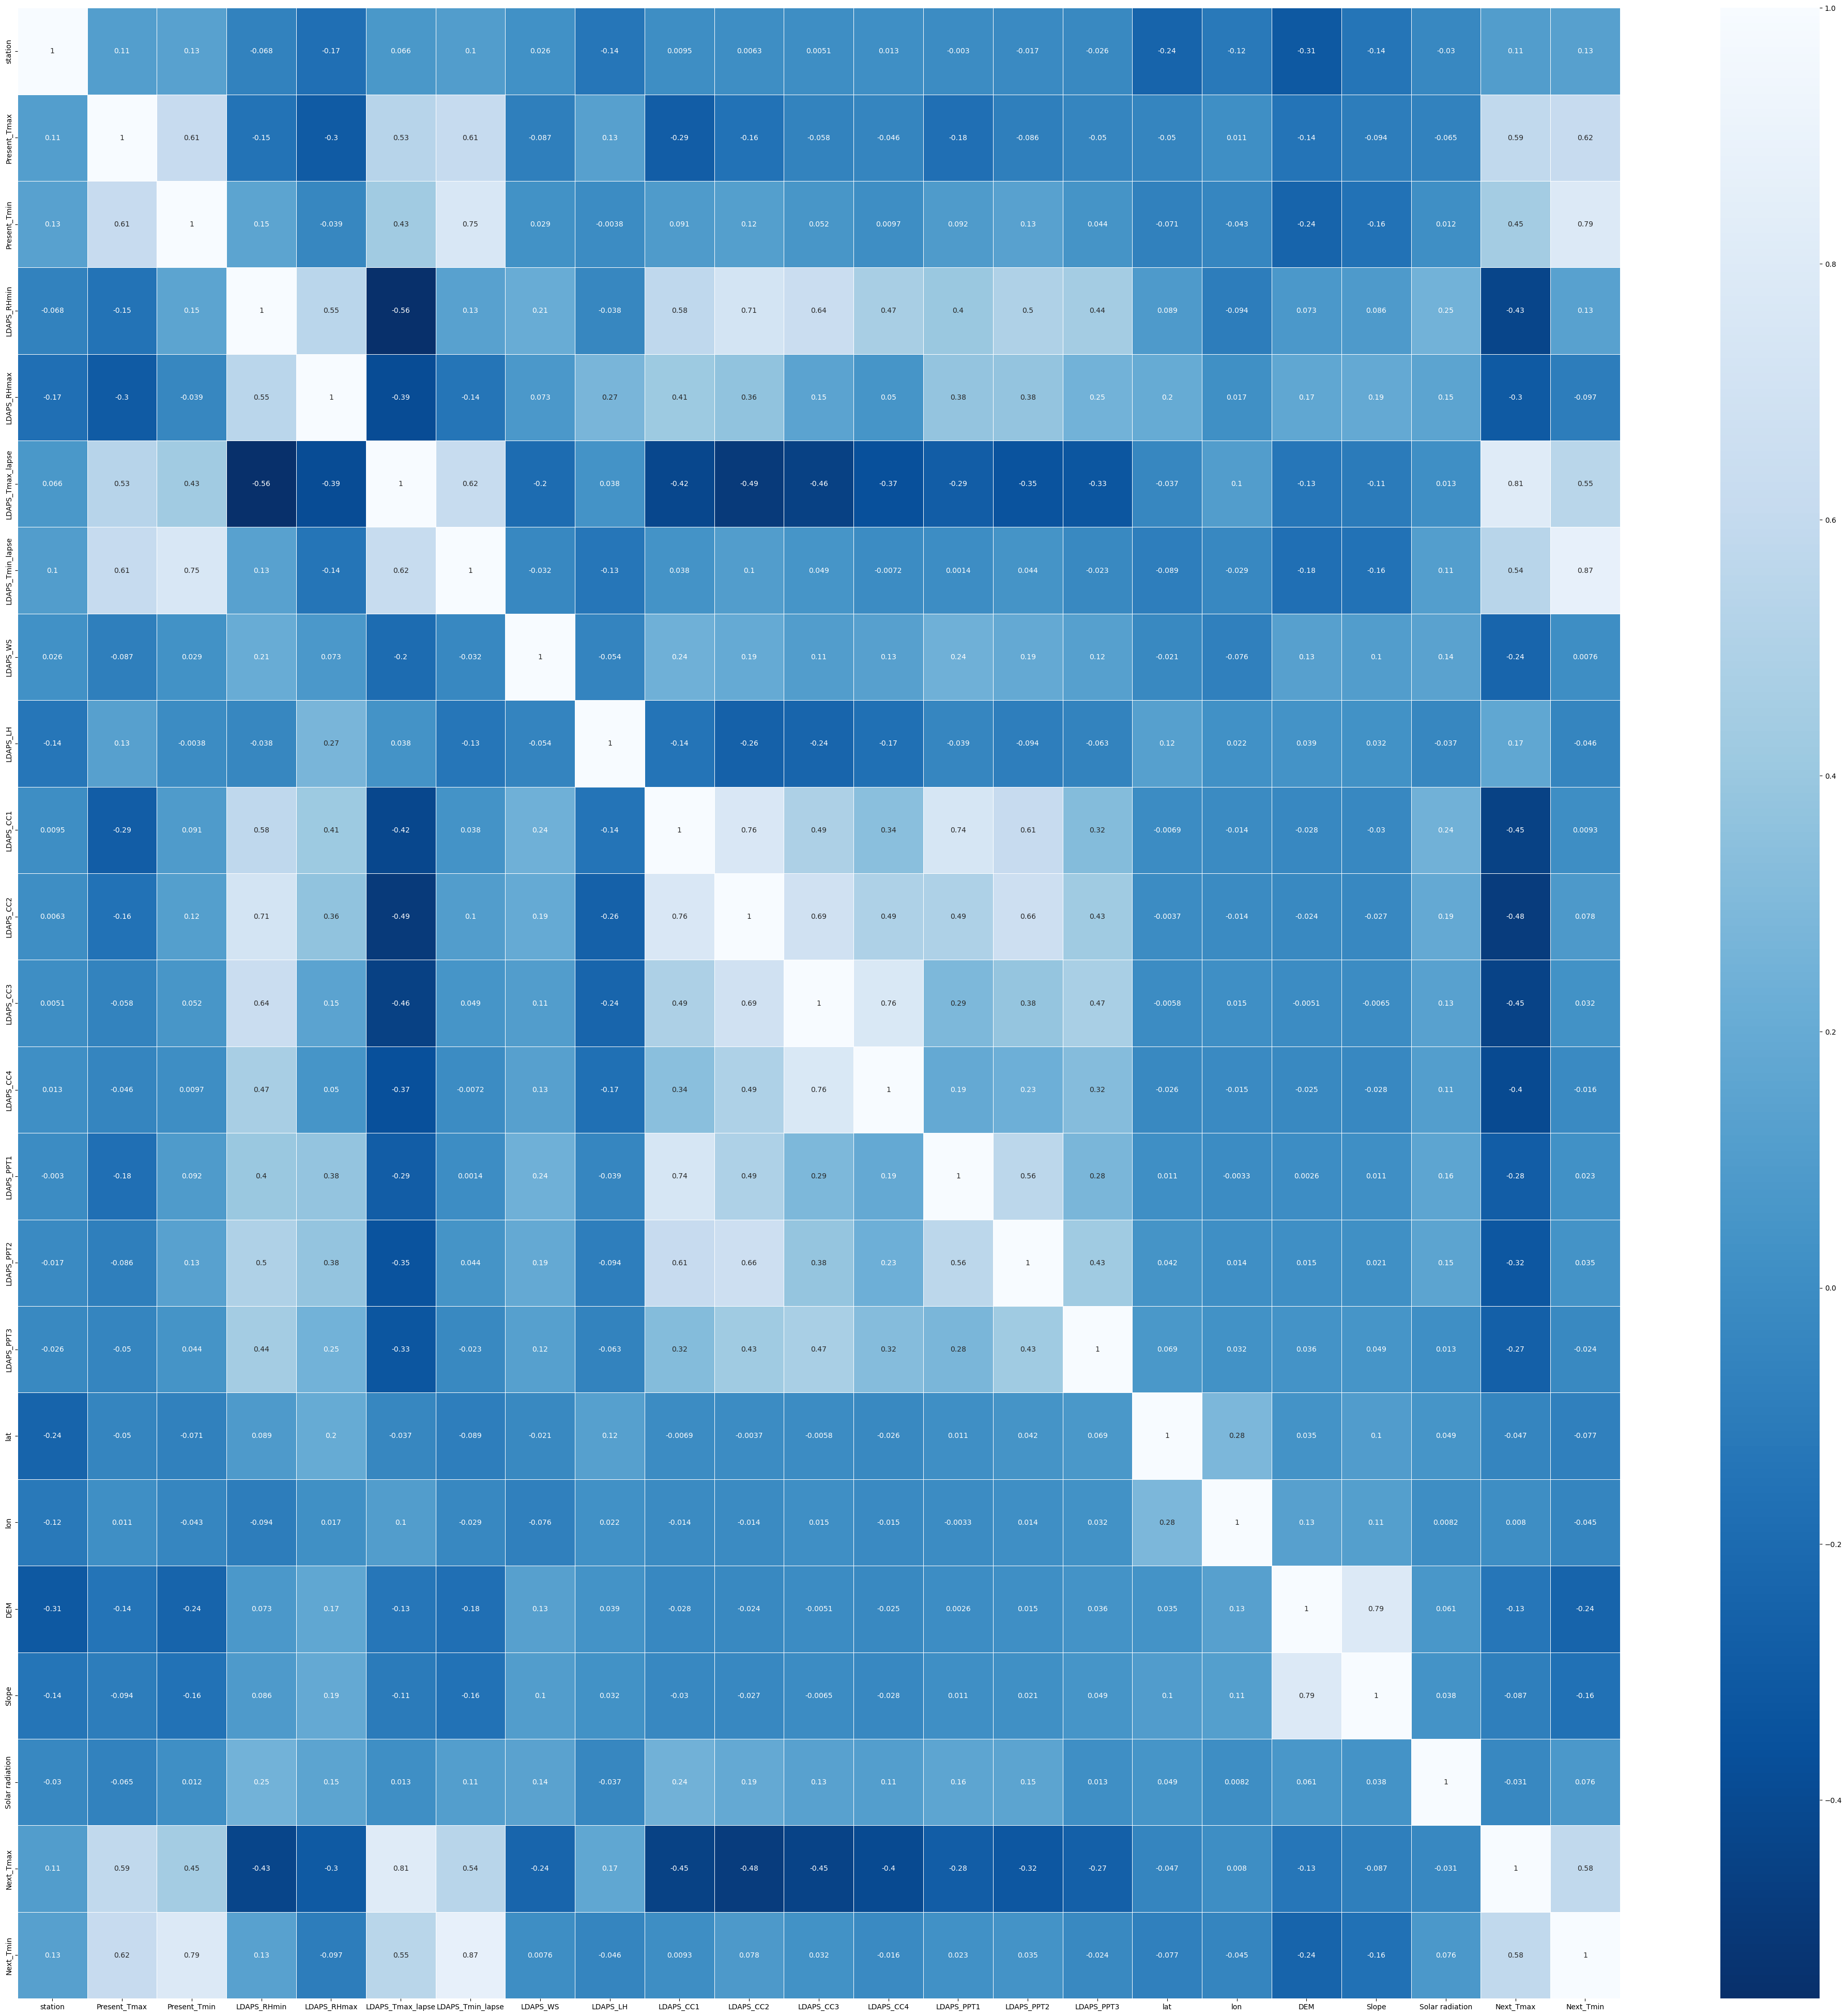

In [85]:
#Let's plot a heatmap for visualizing the correlation between features and label
plt.figure(figsize=(50, 50))
sns.heatmap(df.corr(), annot=True, linewidth=0.5, cmap='Blues_r')
plt.show()

Here we can notice that Next_Tmax has positive correlation with station 11%, Present_Tmax 59%, Present_Tmin 45%, LDAPS_Tmax_lapse 81%, LDAPS_Tmin_lapse 54%, LDAPS_LH 17% and Next_Tmin 58%.

#### Let's do some comparision

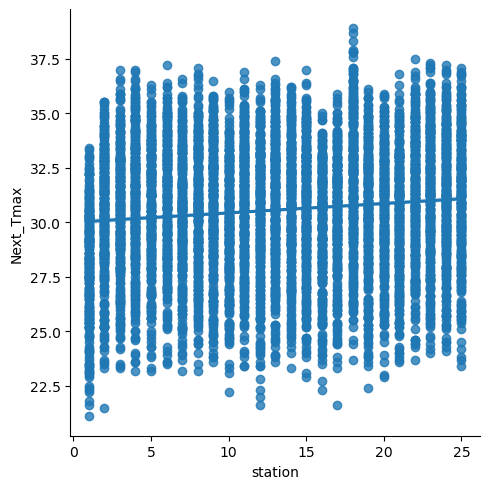

In [86]:
#Comparing Next_Tmax with station
sns.lmplot(x='station', y='Next_Tmax', data=df, palette='colorblind')

Slight positive correlation between station and Next_Tmax.

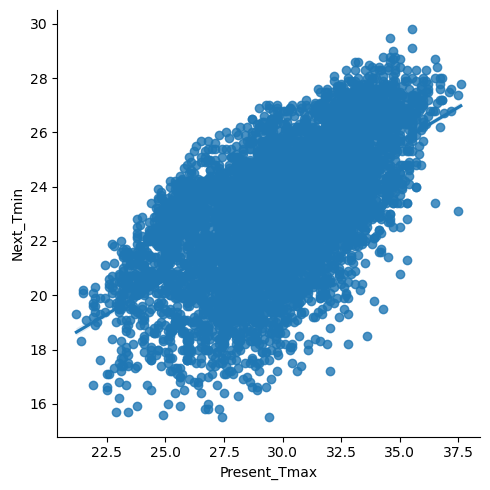

In [88]:
#Comparing Next_Tmax with Present_Tmax
sns.lmplot(x='Present_Tmax', y='Next_Tmin', data=df, palette='colorblind')

We can see a highly positive correlation between Present_Tmax and Next_Tmax.

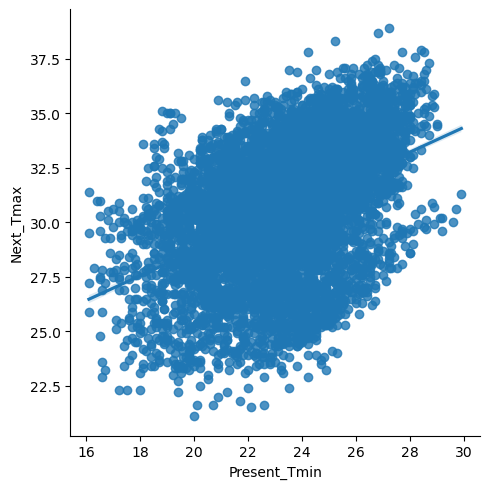

In [91]:
#Comparing Next_Tmax with Present_Tmin
sns.lmplot(x='Present_Tmin', y='Next_Tmax', data=df, palette='colorblind')

We can noitce a high positive correlation between Present_Tmin and Next_Tmax.

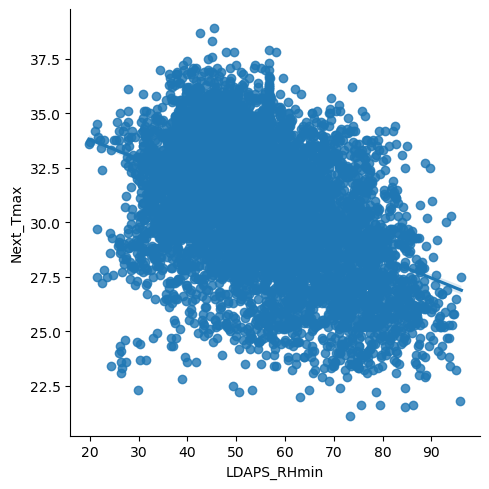

In [92]:
#Comparing Next_Tmax with LDAPS_RHmin
sns.lmplot(x='LDAPS_RHmin', y='Next_Tmax', data=df, palette='colorblind')

Highly negative correlation.

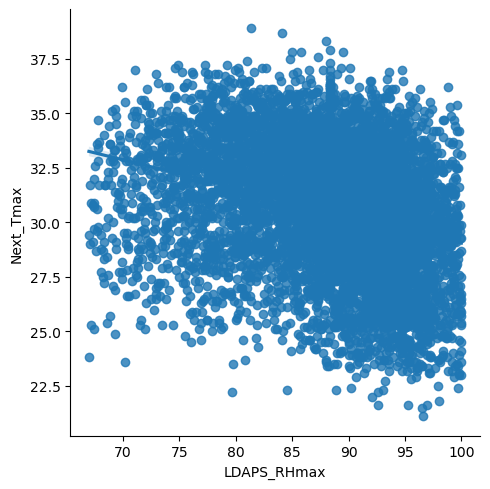

In [93]:
#Comparing Next_Tmax with LDAPS_RHmax
sns.lmplot(x='LDAPS_RHmax', y='Next_Tmax', data=df, palette='colorblind')

Negative correlation.

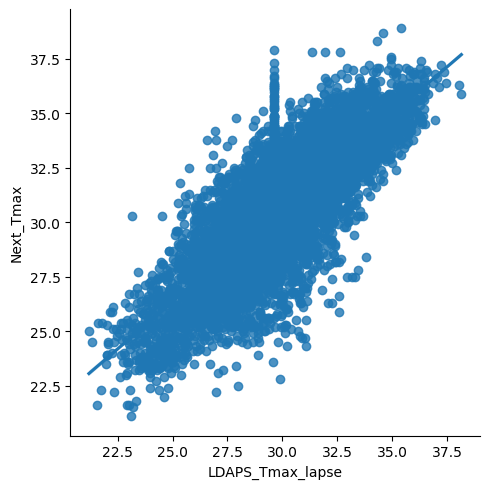

In [94]:
#Comparing Next_Tmax with LDAPS_Tmax_lapse
sns.lmplot(x='LDAPS_Tmax_lapse', y='Next_Tmax', data=df, palette='colorblind')

There is a high positive correlation between Next_Tmax and LDAPS_Tmax_lapse.

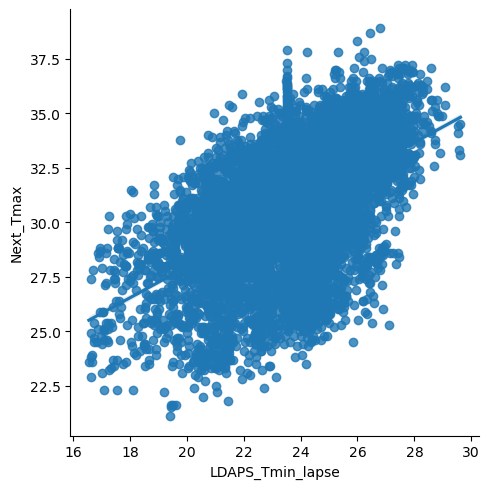

In [95]:
#Comparing Next_Tmax with LDAPS_Tmin_lapse
sns.lmplot(x='LDAPS_Tmin_lapse', y='Next_Tmax', data=df, palette='colorblind')

Positive correlation.

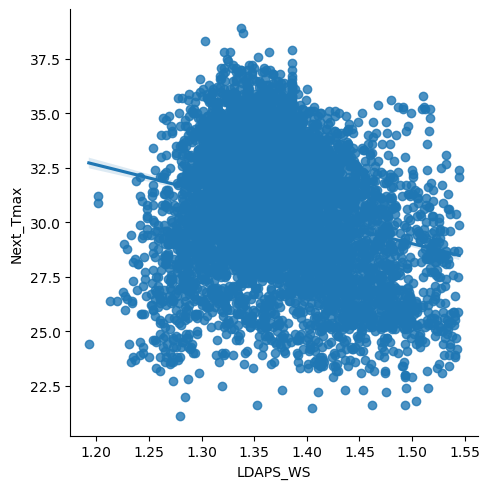

In [96]:
#Comparing Next_Tmax with LDAPS_WS
sns.lmplot(x='LDAPS_WS', y='Next_Tmax', data=df, palette='colorblind')

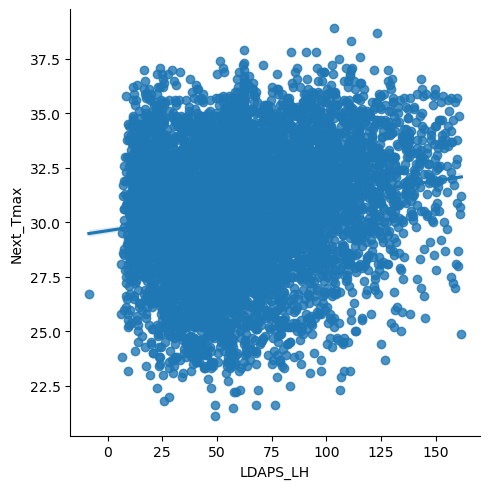

In [97]:
#Comparing Next_Tmax with LDAPS_LH
sns.lmplot(x='LDAPS_LH', y='Next_Tmax', data=df, palette='colorblind')

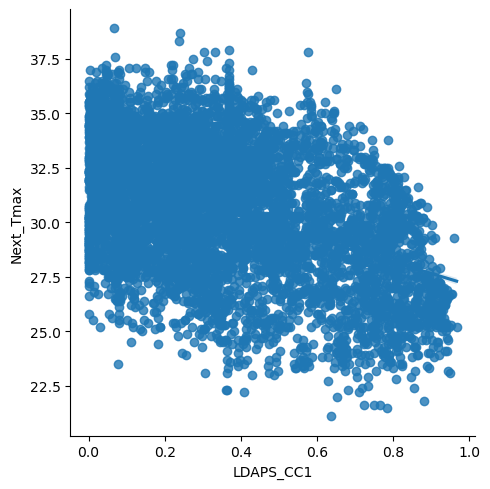

In [98]:
#Comparing Next_Tmax with LDAPS_CC1
sns.lmplot(x='LDAPS_CC1', y='Next_Tmax', data=df, palette='colorblind')

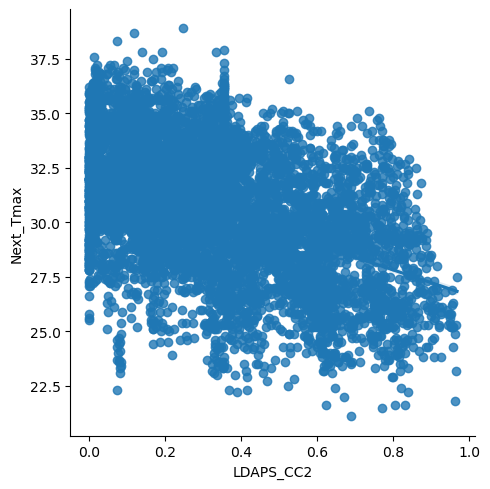

In [99]:
#Comparing Next_Tmax with LDAPS_CC2
sns.lmplot(x='LDAPS_CC2', y='Next_Tmax', data=df, palette='colorblind')

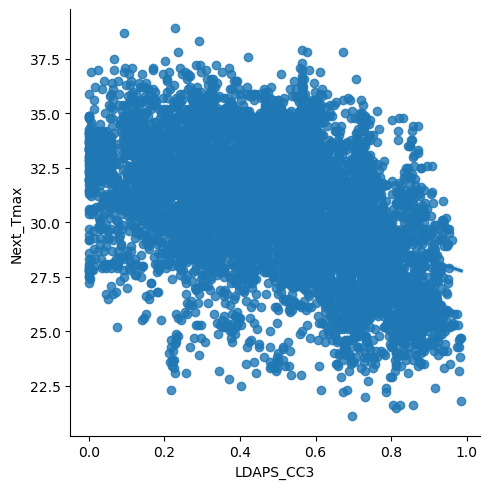

In [100]:
#Comparing Next_Tmax with LDAPS_CC3
sns.lmplot(x='LDAPS_CC3', y='Next_Tmax', data=df, palette='colorblind')

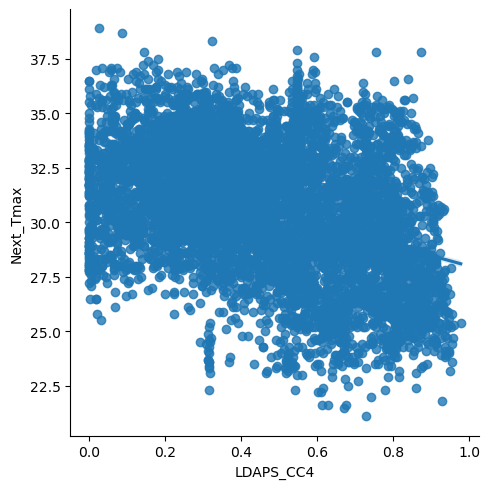

In [101]:
#Comparing Next_Tmax with LDAPS_CC4
sns.lmplot(x='LDAPS_CC4', y='Next_Tmax', data=df, palette='colorblind')

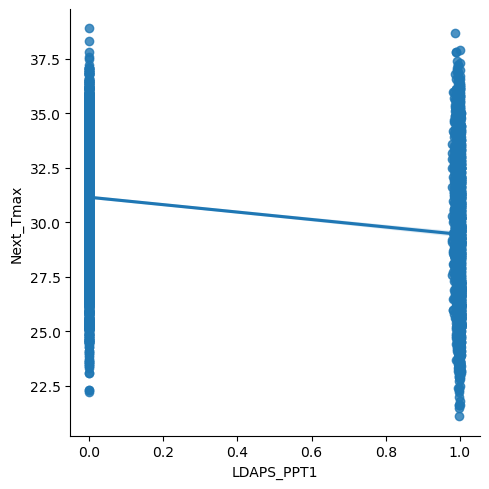

In [102]:
#Comparing Next_Tmax with LDAPS_PPT1
sns.lmplot(x='LDAPS_PPT1', y='Next_Tmax', data=df, palette='colorblind')

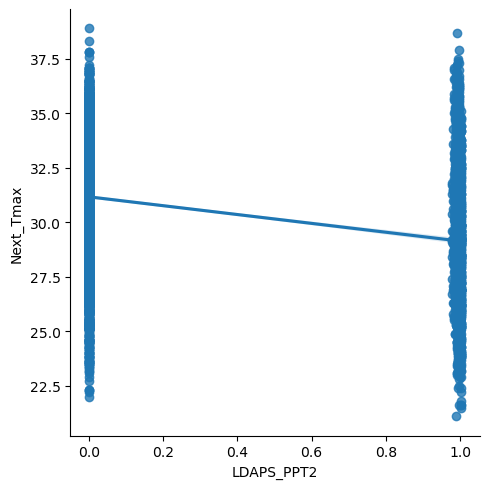

In [103]:
#Comparing Next_Tmax with LDAPS_PPT2
sns.lmplot(x='LDAPS_PPT2', y='Next_Tmax', data=df, palette='colorblind')

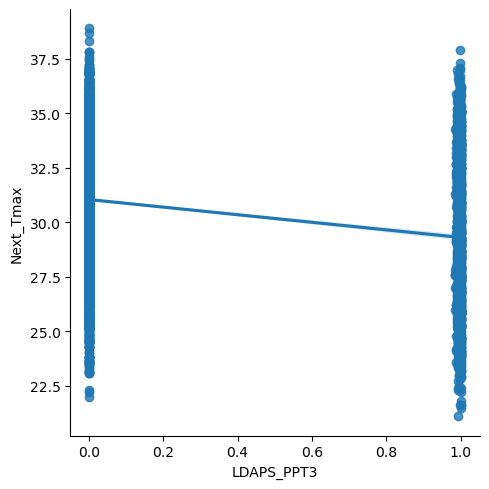

In [104]:
#Comparing Next_Tmax with LDAPS_PPT3
sns.lmplot(x='LDAPS_PPT3', y='Next_Tmax', data=df, palette='colorblind')

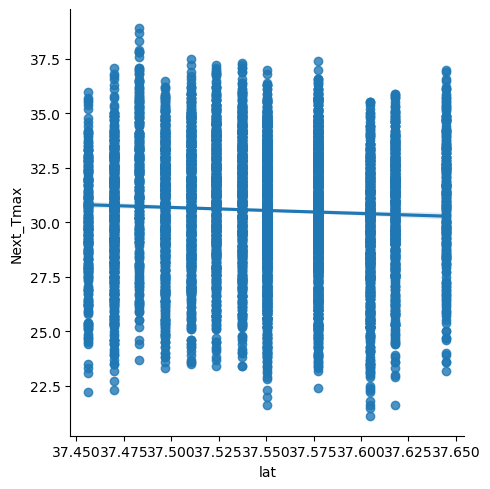

In [105]:
#Comparing Next_Tmax with lat
sns.lmplot(x='lat', y='Next_Tmax', data=df, palette='colorblind')

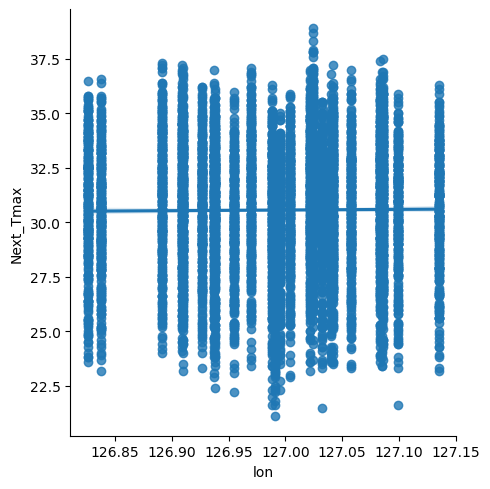

In [106]:
#Comparing Next_Tmax with lon
sns.lmplot(x='lon', y='Next_Tmax', data=df, palette='colorblind')

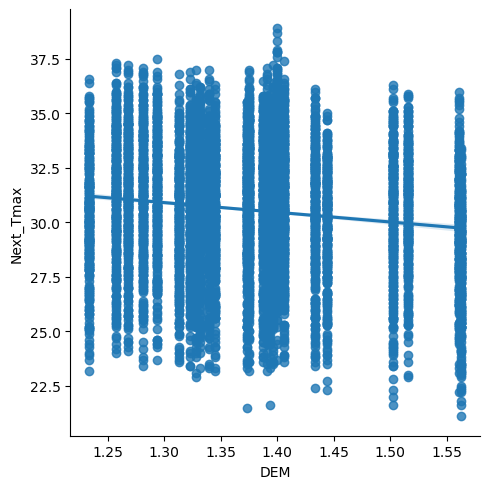

In [107]:
#Comparing Next_Tmax with DEM
sns.lmplot(x='DEM', y='Next_Tmax', data=df, palette='colorblind')

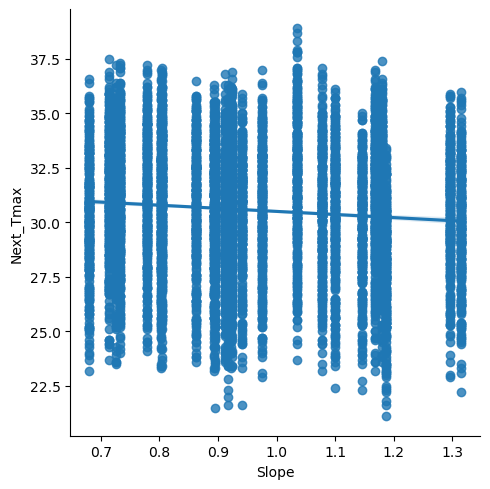

In [108]:
#Comparing Next_Tmax with Slope
sns.lmplot(x='Slope', y='Next_Tmax', data=df, palette='colorblind')

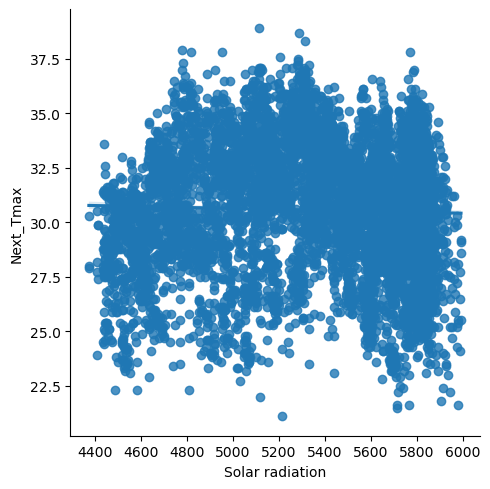

In [109]:
#Comparing Next_Tmax with Solar radiation
sns.lmplot(x='Solar radiation', y='Next_Tmax', data=df, palette='colorblind')

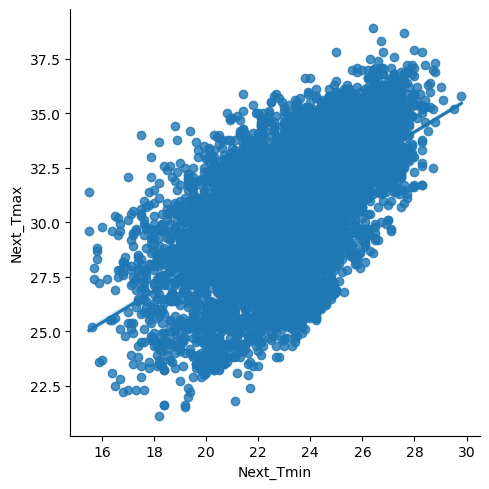

In [110]:
#Comparing Next_Tmax with Next_Tmin
sns.lmplot(x='Next_Tmin', y='Next_Tmax', data=df, palette='colorblind')

There is a high positive correlation between Next_Tmax and Next_Tmin.

Since we have already checked for outliers and applied Z score method and IQR method and removed skewness, there is no need to do it again. So let's just separate the data into features and label.

### Separarting into Features and Label

In [86]:
#Let's separate features and label
x1 = df.drop("Next_Tmax", axis=1)
y1 = df["Next_Tmax"]

We have already standardized our data and checked for VIF so there's no need to do it again as our data is already cleaned.

Let's just do data modelling.
Since the data is numerical and not categorical, we will use regression algorithms again for modelling and training of data.

### Data Modelling

In [87]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

### Creating Train Test Split

In [88]:
#Finding the best random state
maxAccu = 0
maxRS = 0
for i in range(1,200):
    x1_train, x1_test, y1_train, y1_test = train_test_split(x1,y1, test_size=0.30, random_state=i)
    lr = LinearRegression()
    lr.fit(x1_train, y1_train)
    pred = lr.predict(x1_test)
    acc = r2_score(y1_test, pred)
    if acc > maxAccu:
        maxAcuu=acc
        maxRS=i
print("Maximum r2 score is ", maxAccu, "on Random_state ", maxRS)        

Maximum r2 score is  0 on Random_state  199


### Model Training

In [89]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x1,y1,test_size=0.30,random_state=maxRS)

### Regression Algorithms

In [90]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso, Ridge
from sklearn.svm import SVR
from sklearn.ensemble import ExtraTreesRegressor

In [91]:
#Linear Regression
lr = LinearRegression()
lr.fit(x1_train, y1_train)
pred_lr = lr.predict(x1_test)
pred_train = lr.predict(x1_train)
print('R2 Score:', r2_score(y1_test, pred_lr))
print('R2 Score on training data:', r2_score(y1_train, pred_train)*100)
print('Mean Absolute Error:', mean_absolute_error(y1_test, pred_lr))
print('Mean Squared Error:', mean_squared_error(y1_test, pred_lr))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y1_test, pred_lr)))

R2 Score: 0.7794556369703901
R2 Score on training data: 76.69598936014476
Mean Absolute Error: 1.0560573867906327
Mean Squared Error: 1.8649082986772474
Root Mean Squared Error: 1.3656164537223647


In [92]:
#Random Forest
rf = RandomForestRegressor()
rf.fit(x1_train, y1_train)
pred_rf = rf.predict(x1_test)
pred_train = rf.predict(x1_train)
print('R2 Score:', r2_score(y1_test, pred_rf))
print('R2 Score on training data:', r2_score(y1_train, pred_train)*100)
print('Mean Absolute Error:', mean_absolute_error(y1_test, pred_rf))
print('Mean Squared Error:', mean_squared_error(y1_test, pred_rf))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y1_test, pred_rf)))

R2 Score: 0.8893911426124239
R2 Score on training data: 98.36116984829091
Mean Absolute Error: 0.715778261624442
Mean Squared Error: 0.9353010578719917
Root Mean Squared Error: 0.9671096410810884


In [93]:
#KNN
knn = KNeighborsRegressor()
knn.fit(x1_train, y1_train)
pred_knn = knn.predict(x1_test)
pred_train = knn.predict(x1_train)
print('R2 Score:', r2_score(y1_test, pred_knn))
print('R2 Score on training data:', r2_score(y1_train, pred_train)*100)
print('Mean Absolute Error:', mean_absolute_error(y1_test, pred_knn))
print('Mean Squared Error:', mean_squared_error(y1_test, pred_knn))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y1_test, pred_knn)))

R2 Score: 0.5429983720846336
R2 Score on training data: 69.61134702769948
Mean Absolute Error: 1.5245095781305475
Mean Squared Error: 3.8643750250554105
Root Mean Squared Error: 1.965801369684997


In [94]:
#Gradient Boosting
gb = GradientBoostingRegressor()
gb.fit(x1_train, y1_train)
pred_gb = gb.predict(x1_test)
pred_train = gb.predict(x1_train)
print('R2 Score:', r2_score(y1_test, pred_gb))
print('R2 Score on training data:', r2_score(y1_train, pred_train)*100)
print('Mean Absolute Error:', mean_absolute_error(y1_test, pred_gb))
print('Mean Squared Error:', mean_squared_error(y1_test, pred_gb))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y1_test, pred_gb)))


R2 Score: 0.8467331435173767
R2 Score on training data: 86.79615094598596
Mean Absolute Error: 0.8741167224718112
Mean Squared Error: 1.296014228793705
Root Mean Squared Error: 1.1384262070040838


In [95]:
#Lasso
ls = Lasso()
ls.fit(x1_train, y1_train)
pred_ls = ls.predict(x1_test)
pred_train = ls.predict(x1_train)
print('R2 Score:', r2_score(y1_test, pred_ls))
print('R2 Score on training data:', r2_score(y1_train, pred_train)*100)
print('Mean Absolute Error:', mean_absolute_error(y1_test, pred_ls))
print('Mean Squared Error:', mean_squared_error(y1_test, pred_ls))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y1_test, pred_ls)))

R2 Score: 0.7090007562194157
R2 Score on training data: 69.31534990678183
Mean Absolute Error: 1.21822686962223
Mean Squared Error: 2.460670031100975
Root Mean Squared Error: 1.5686522977068484


In [96]:
#Ridge
rd = Ridge()
rd.fit(x1_train, y1_train)
pred_rd = rd.predict(x1_test)
pred_train = rd.predict(x1_train)
print('R2 Score:', r2_score(y1_test, pred_rd))
print('R2 Score on training data:', r2_score(y1_train, pred_train)*100)
print('Mean Absolute Error:', mean_absolute_error(y1_test, pred_rd))
print('Mean Squared Error:', mean_squared_error(y1_test, pred_rd))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y1_test, pred_rd)))

R2 Score: 0.779711871779364
R2 Score on training data: 76.68986245759676
Mean Absolute Error: 1.0556180715147514
Mean Squared Error: 1.8627415943684131
Root Mean Squared Error: 1.3648229168534698


In [97]:
#Decision Tree
dt = DecisionTreeRegressor()
dt.fit(x1_train, y1_train)
pred_dt = dt.predict(x1_test)
pred_train = dt.predict(x1_train)
print('R2 Score:', r2_score(y1_test, pred_dt))
print('R2 Score on training data:', r2_score(y1_train, pred_train)*100)
print('Mean Absolute Error:', mean_absolute_error(y1_test, pred_dt))
print('Mean Squared Error:', mean_squared_error(y1_test, pred_dt))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y1_test, pred_dt)))

R2 Score: 0.746582721798188
R2 Score on training data: 100.0
Mean Absolute Error: 1.0471482713691558
Mean Squared Error: 2.1428794581492405
Root Mean Squared Error: 1.463857731526271


In [98]:
#SVR
sv = SVR()
sv.fit(x1_train, y1_train)
pred_sv = sv.predict(x1_test)
pred_train = sv.predict(x1_train)
print('R2 Score:', r2_score(y1_test, pred_sv))
print('R2 Score on training data:', r2_score(y1_train, pred_train)*100)
print('Mean Absolute Error:', mean_absolute_error(y1_test, pred_sv))
print('Mean Squared Error:', mean_squared_error(y1_test, pred_sv))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y1_test, pred_sv)))

R2 Score: 0.029560052019238947
R2 Score on training data: 3.2408380610636556
Mean Absolute Error: 2.3149624011512198
Mean Squared Error: 8.205974922670135
Root Mean Squared Error: 2.864607289432556


In [99]:
#Extra Trees
et = ExtraTreesRegressor()
et.fit(x1_train, y1_train)
pred_et = et.predict(x1_test)
pred_train = et.predict(x1_train)
print('R2 Score:', r2_score(y1_test, pred_et))
print('R2 Score on training data:', r2_score(y1_train, pred_train)*100)
print('Mean Absolute Error:', mean_absolute_error(y1_test, pred_et))
print('Mean Squared Error:', mean_squared_error(y1_test, pred_et))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y1_test, pred_et)))

R2 Score: 0.9130234460804039
R2 Score on training data: 100.0
Mean Absolute Error: 0.6454624315484708
Mean Squared Error: 0.7354678893934222
Root Mean Squared Error: 0.8575942451960731


Among these algorithms Extra Trees Regressor gives best result of 91% R2 score.

### Cross Validation Score

In [100]:
from sklearn.model_selection import cross_val_score

In [101]:
#Linear 
Score = cross_val_score(lr, x1, y1)
print(Score)
print(Score.mean())
print("Difference between R2 score and cross validation score is:", (r2_score(y1_test, pred_lr) - Score.mean())*100)

[0.71596358 0.65894423 0.69521625 0.75916281 0.67456613]
0.7007706006568044
Difference between R2 score and cross validation score is: 7.8685036313585695


In [102]:
#Random
Score = cross_val_score(rf, x1, y1)
print(Score)
print(Score.mean())
print("Difference between R2 score and cross validation score is:", (r2_score(y1_test, pred_rf) - Score.mean())*100)

[0.70889898 0.66530066 0.66661817 0.72202161 0.6548778 ]
0.6835434429822482
Difference between R2 score and cross validation score is: 20.584769963017568


In [103]:
#KNN
Score = cross_val_score(knn, x1, y1)
print(Score)
print(Score.mean())
print("Difference between R2 score and cross validation score is:", (r2_score(y1_test, pred_knn) - Score.mean())*100)

[ 0.40970759 -0.08091032  0.10131762  0.31619021  0.1906573 ]
0.18739247999233757
Difference between R2 score and cross validation score is: 35.56058920922961


In [104]:
#Gradient Boost
Score = cross_val_score(gb, x1, y1)
print(Score)
print(Score.mean())
print("Difference between R2 score and cross validation score is:", (r2_score(y1_test, pred_gb) - Score.mean())*100)

[0.6901771  0.66034338 0.68267601 0.77473521 0.66748758]
0.6950838545843111
Difference between R2 score and cross validation score is: 15.164928893306563


In [105]:
#Lasso
Score = cross_val_score(ls, x1, y1)
print(Score)
print(Score.mean())
print("Difference between R2 score and cross validation score is:", (r2_score(y1_test, pred_ls) - Score.mean())*100)

[0.63963436 0.60311983 0.64360521 0.66735407 0.64964024]
0.6406707416278505
Difference between R2 score and cross validation score is: 6.8330014591565185


In [106]:
#Ridge
Score = cross_val_score(rd, x1, y1)
print(Score)
print(Score.mean())
print("Difference between R2 score and cross validation score is:", (r2_score(y1_test, pred_rd) - Score.mean())*100)

[0.71441884 0.66399845 0.69547958 0.75785258 0.67683108]
0.7017161056629153
Difference between R2 score and cross validation score is: 7.799576611644865


In [107]:
#SVR
Score = cross_val_score(sv, x1, y1)
print(Score)
print(Score.mean())
print("Difference between R2 score and cross validation score is:", (r2_score(y1_test, pred_sv) - Score.mean())*100)

[-0.03034042 -0.33673792  0.02994519 -0.20865391 -0.06344373]
-0.12184615988043782
Difference between R2 score and cross validation score is: 15.140621189967677


In [108]:
#Extra Trees
Score = cross_val_score(et, x1, y1)
print(Score)
print(Score.mean())
print("Difference between R2 score and cross validation score is:", (r2_score(y1_test, pred_et) - Score.mean())*100)

[0.71657602 0.66087794 0.68443771 0.75165499 0.65352825]
0.6934149813835937
Difference between R2 score and cross validation score is: 21.960846469681016


Also in this case Ridge Regression works better with least difference between R2 score and cross validation score.

Now let's go ahead and perform Hyper parameter tuning.

### Hyper parameter Tuning

In [109]:
from sklearn.model_selection import GridSearchCV

In [110]:
#Ridge regressor
param = {'alpha': [1.0, 0.05, 0.4, 2], 'fit_intercept': [True, False],
        'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sag', 'saga', 'lbfgs'],
        'positive': [True, False],
        'random_state': [1, 4, 10, 20]}
grid = GridSearchCV(Ridge(), param, cv=5)
grid.fit(x1_train, y1_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1.0, 0.05, 0.4, 2],
                         'fit_intercept': [True, False],
                         'positive': [True, False],
                         'random_state': [1, 4, 10, 20],
                         'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sag',
                                    'saga', 'lbfgs']})

In [111]:
grid.best_params_

{'alpha': 0.4,
 'fit_intercept': True,
 'positive': False,
 'random_state': 1,
 'solver': 'auto'}

In [112]:
model = Ridge(alpha=0.04, fit_intercept=True, positive=False, random_state=1, solver='auto')

In [114]:
model.fit(x1_train, y1_train)
pred = model.predict(x1_test)
print('R2 score:', r2_score(y1_test, pred))
print('Mean Absolute Error:', mean_absolute_error(y1_test, pred))
print('Mean Squared Error:', mean_squared_error(y1_test, pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y1_test, pred)))

R2 score: 0.7794690556303001
Mean Absolute Error: 1.056027361358747
Mean Squared Error: 1.8647948313916651
Root Mean Squared Error: 1.3655749087441762


We got 77% R2 score.

### Saving the model

In [115]:
import pickle

In [116]:
filename = 'Next_Max_Temp.pkl'
pickle.dump(model, open(filename, 'wb'))
#Model saved

In [117]:
loaded_model = pickle.load(open ('Next_Max_Temp.pkl','rb'))
result = loaded_model.score(x1_test, y1_test)
print(result*100)

77.94690556303001


In [118]:
conclusion = pd.DataFrame([loaded_model.predict(x1_test)[:], y1_test[:]], index=["Predicted", "Original"])
conclusion

0          1         2         3         4          5     \
Predicted  30.464876  30.680538  32.21199  30.22866  27.80093  33.318132   
Original   30.800000  28.700000  32.80000  29.40000  26.90000  34.700000   

                6          7          8          9     ...       2059  \
Predicted  28.293289  28.747895  23.876937  31.259647  ...  28.505385   
Original   28.500000  27.600000  23.900000  31.400000  ...  29.900000   

                2060     2061     2062       2063       2064       2065  \
Predicted  33.478981  31.2926  30.9228  31.140919  33.562227  31.004486   
Original   33.700000  32.7000  30.1000  31.500000  35.500000  31.600000   

                2066       2067       2068  
Predicted  34.062669  29.763987  35.937682  
Original   33.000000  30.500000  34.400000  

[2 rows x 2069 columns]

Done!!!

### Documentation

- First we imported necessary libraries.
- Imported data set.
- Performed EDA. Under EDA we checked for various functions such as checking for shape, columns, data types, presence of nulls and filled the nulls using fillna(), data info(), data description, unique values in the data set, checked the value counts of each column.
- Then we changed the Date column to datetime type and made it the index.
- Then we did data visualization.
- Checked for correlation.
- Compared different columns with label.
- Checked for outliers.
- Applied Z score and IQR methods to remove the outliers.
- Checked for skewness and reduced it.
- Separated features and label.
- Dropped the column which was of no use.
- Scaled the features using Standard Scaler.
- Checked for VIF.
- Then comes Data Modelling.
- Created Train Test Split.
- Trained the models with different algorithms and got R2 score.
- Applied CV score to get the best model.
- Performed Hyper parameter tuning to increase the score.
- Finally saved the model.

- Did the same thing for both the predictions 1. Next_Tmin and 2. Next_Tmax.
As we have already imported the algorithms and did all the EDA previously so we did not perform it for the second prediction. We only did the visualization followed by the other processes done in the previous prediction.